<span style="color: blue;font-weight: bold; font-size: 40px;"MLJAR AutoML: ISBSG Data Analysis & Regression</span>


In [1]:
# <span style="color: blue;">ISBSG Data Analysis & Regression</span>


In [2]:
# # ISBSG Data Analysis and Regression Modeling
# 
# This notebook performs data cleaning, preprocessing, and regression modeling on the ISBSG dataset.

# ## Setup and Environment Configuration

# Install required packages (uncomment if needed)
# !pip install -r requirements.txt

In [3]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

import os

os.environ["TPOT_USE_DASK"] = "False"

<a id = 'Index:'></a>

# Table of Content

In this notebook you will apply xxxxxxx


- [Part 1](#part1)- Data Loading and Initial Exploration
- [Part 2](#part2)- Data Cleaning and Preprocessing
- [Part 3](#part3)- Data Profiling
- [Part 4](#part4)- Module Building with PyCaret
- [Part 5](#part5)- Model Preparation
- [Part 6](#part6)- Baseline Modeling and Evaluation
- [Part 7](#part7)- Advanced Modeling and Hyperparameter Tuning
- [Part 8](#part8)- Model Comparison and Selection
- [Part 9](#part9)- End


In [4]:
# Configure timestamp callback for Jupyter cells
from IPython import get_ipython

def setup_timestamp_callback():
    """Setup a timestamp callback for Jupyter cells without clearing existing callbacks."""
    ip = get_ipython()
    if ip is not None:
        # Define timestamp function
        def print_timestamp(*args, **kwargs):
            """Print timestamp after cell execution."""
            print(f"Cell executed at: {datetime.now()}")
        
        # Check if our callback is already registered
        callbacks = ip.events.callbacks.get('post_run_cell', [])
        for cb in callbacks:
            if hasattr(cb, '__name__') and cb.__name__ == 'print_timestamp':
                # Already registered
                return
                
        # Register new callback if not already present
        ip.events.register('post_run_cell', print_timestamp)
        print("Timestamp printing activated.")
    else:
        print("Not running in IPython/Jupyter environment.")


# Setup timestamp callback
setup_timestamp_callback()

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

Timestamp printing activated.
Cell executed at: 2025-05-19 20:49:05.258494


[Back to top](#Index:)

<a id='part1'></a>

# Part 1 -Data Loading and Initial Exploration

This section is dedicated to loading the dataset, performing initial data exploration such as viewing the first few rows, and summarizing the dataset's characteristics, including missing values and basic statistical measures.

In [5]:
# Load the data

from pathlib import Path

print("Loading data...")

file_path = "../data/ISBSG2016R1_1_FormattedForCSV_cleaned.csv"
file_name_no_ext = Path(file_path).stem                # 'ISBSG2016R1.1 - FormattedForCSV'
print(file_name_no_ext)


df = pd.read_csv(file_path)


Loading data...
ISBSG2016R1_1_FormattedForCSV_cleaned
Cell executed at: 2025-05-19 20:49:05.345721


# Exploratory Data Analysis

## Data Overview

Dataset shape: (7058, 51)
First 5 rows:


,isbsg_project_id,external_eef_data_quality_rating,project_prf_year_of_project,external_eef_industry_sector,external_eef_organisation_type,project_prf_application_group,project_prf_application_type,project_prf_development_type,tech_tf_development_platform,tech_tf_language_type,...,people_prf_it_experience_great_than_3_yr,people_prf_it_experience_less_than_3_yr,people_prf_it_experience_3_to_9_yr,people_prf_it_experience_great_than_9_yr,people_prf_project_manage_experience,people_prf_project_manage_changes,people_prf_personnel_changes,project_prf_total_project_cost,project_prf_cost_currency,project_prf_currency_multiple
0,10003,b,2015,communication,telecommunications,business application,online. esales,enhancement,multi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10011,b,1996,construction,construction,business application,stock control & order processing,new development,multi,4GL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10012,b,2002,wholesale & retail,billing,business application,billing,enhancement,NaN,3GL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10014,b,2004,NaN,NaN,NaN,NaN,enhancement,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10015,b,2000,wholesale & retail,wholesale & retail trade,business application,management information system,enhancement,mf,3GL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Last 5 rows:


,isbsg_project_id,external_eef_data_quality_rating,project_prf_year_of_project,external_eef_industry_sector,external_eef_organisation_type,project_prf_application_group,project_prf_application_type,project_prf_development_type,tech_tf_development_platform,tech_tf_language_type,...,people_prf_it_experience_great_than_3_yr,people_prf_it_experience_less_than_3_yr,people_prf_it_experience_3_to_9_yr,people_prf_it_experience_great_than_9_yr,people_prf_project_manage_experience,people_prf_project_manage_changes,people_prf_personnel_changes,project_prf_total_project_cost,project_prf_cost_currency,project_prf_currency_multiple
7053,32757,b,1998,NaN,NaN,NaN,NaN,new development,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7054,32758,b,1995,government,government,business application,management information system,enhancement,mf,3GL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7055,32762,b,2014,communication,telecommunications,business application,customer relationship management,enhancement,multi,3GL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7056,32766,a,2000,government,public administration,business application,electronic data interchange,new development,pc,3GL,...,NaN,NaN,NaN,NaN,17.0,0.0,0.0,3975.0,"canada, dollar",NaN
7057,32767,b,2009,manufacturing,manufacturing,business application,cars selling,enhancement,multi,3GL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Duplicate Rows

Number of duplicate rows: 0


## Data Types and Memory Usage

,Data Type,Memory Usage (MB)
Index,NaN,0.000126
_case_tool_used,object,0.274487
external_eef_data_quality_rating,object,0.390400
external_eef_industry_sector,object,0.422659
external_eef_organisation_type,object,0.451260
isbsg_project_id,int64,0.053848
people_prf_ba_team_experience_1_to_3_yr,float64,0.053848
people_prf_ba_team_experience_great_than_3_yr,float64,0.053848
people_prf_ba_team_experience_less_than_1_yr,float64,0.053848
people_prf_it_experience_1_to_3_yr,float64,0.053848


## Unique Values Per Column

isbsg_project_id: 7055 unique values
external_eef_data_quality_rating: 2 unique values
project_prf_year_of_project: 27 unique values
external_eef_industry_sector: 17 unique values
external_eef_organisation_type: 178 unique values
project_prf_application_group: 6 unique values
project_prf_application_type: 526 unique values
project_prf_development_type: 3 unique values
tech_tf_development_platform: 6 unique values
tech_tf_language_type: 5 unique values
tech_tf_primary_programming_language: 122 unique values
project_prf_functional_size: 1160 unique values
project_prf_relative_size: 9 unique values
project_prf_normalised_work_effort_level_1: 3792 unique values
project_prf_normalised_work_effort: 4214 unique values
project_prf_normalised_level_1_pdr_ufp: 988 unique values
project_prf_normalised_pdr_ufp: 1019 unique values
project_prf_defect_density: 395 unique values
project_prf_speed_of_delivery: 1414 unique values
project_prf_manpower_delivery_rate: 392 unique values
project_prf_project_

## Type Conversion Suggestions

Consider converting to 'category' dtype for memory/performance:
['external_eef_data_quality_rating', 'external_eef_industry_sector', 'external_eef_organisation_type', 'project_prf_application_group', 'project_prf_development_type', 'tech_tf_development_platform', 'tech_tf_language_type', 'tech_tf_primary_programming_language', 'project_prf_relative_size', 'project_prf_team_size_group', '_case_tool_used', 'process_pmf_development_methodologies', 'process_pmf_prototyping_used', 'tech_tf_architecture', 'tech_tf_client_server', 'tech_tf_client_roles', 'tech_tf_server_roles', 'tech_tf_type_of_server', 'tech_tf_web_development', 'tech_tf_dbms_used', 'people_prf_project_user_involvement', 'project_prf_cost_currency', 'project_prf_currency_multiple']


## Summary Statistics

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
isbsg_project_id,7058.000000,nan,nan,nan,21335.873052,6545.814378,10003.000000,15655.500000,21367.500000,26920.500000,32767.000000
external_eef_data_quality_rating,7058,2,b,5957,nan,nan,nan,nan,nan,nan,nan
project_prf_year_of_project,7058.000000,nan,nan,nan,2004.763814,5.892202,1989.000000,2000.000000,2004.000000,2010.000000,2015.000000
external_eef_industry_sector,5836,17,communication,1363,nan,nan,nan,nan,nan,nan,nan
external_eef_organisation_type,5853,178,insurance,1021,nan,nan,nan,nan,nan,nan,nan
project_prf_application_group,4962,6,business application,4468,nan,nan,nan,nan,nan,nan,nan
project_prf_application_type,5591,526,financial transaction process/accounting,973,nan,nan,nan,nan,nan,nan,nan
project_prf_development_type,7058,3,enhancement,4834,nan,nan,nan,nan,nan,nan,nan
tech_tf_development_platform,5198,6,multi,1942,nan,nan,nan,nan,nan,nan,nan
tech_tf_language_type,5766,5,3GL,3716,nan,nan,nan,nan,nan,nan,nan


## Missing Values

,Missing Values,Percentage (%)
people_prf_it_experience_less_than_1_yr,7001,99.190000
people_prf_it_experience_1_to_3_yr,6990,99.040000
people_prf_it_experience_great_than_3_yr,6976,98.840000
tech_tf_client_roles,6791,96.220000
people_prf_it_experience_less_than_3_yr,6785,96.130000
people_prf_ba_team_experience_less_than_1_yr,6784,96.120000
tech_tf_client_server,6779,96.050000
people_prf_ba_team_experience_1_to_3_yr,6764,95.830000
people_prf_it_experience_great_than_9_yr,6761,95.790000
people_prf_it_experience_3_to_9_yr,6717,95.170000


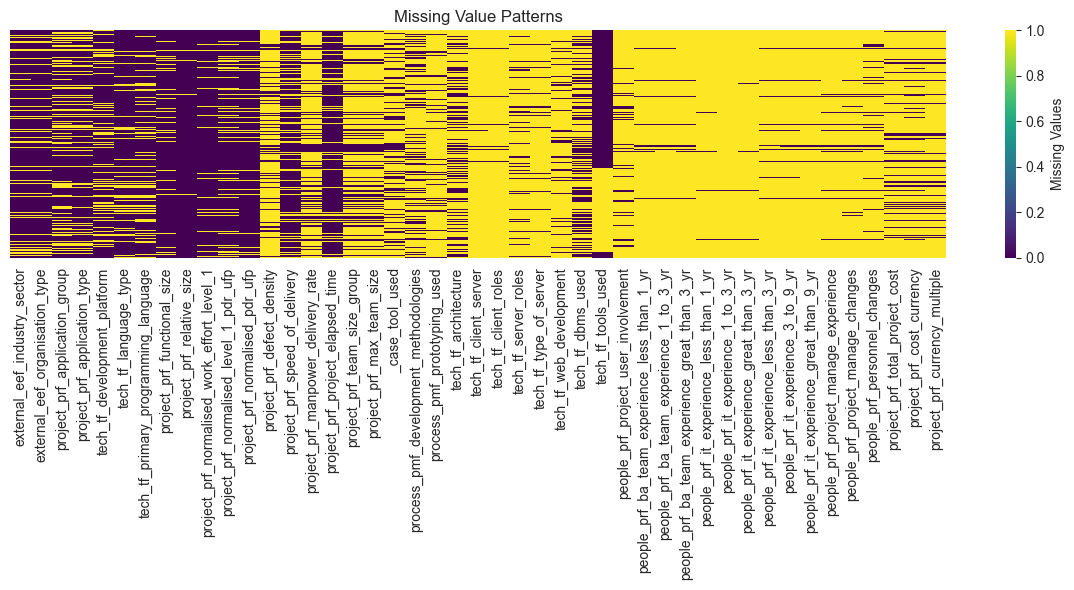

## Distribution of Numerical Features

C:\Users\jdche\AppData\Local\Temp\ipykernel_12820\14068265.py:124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


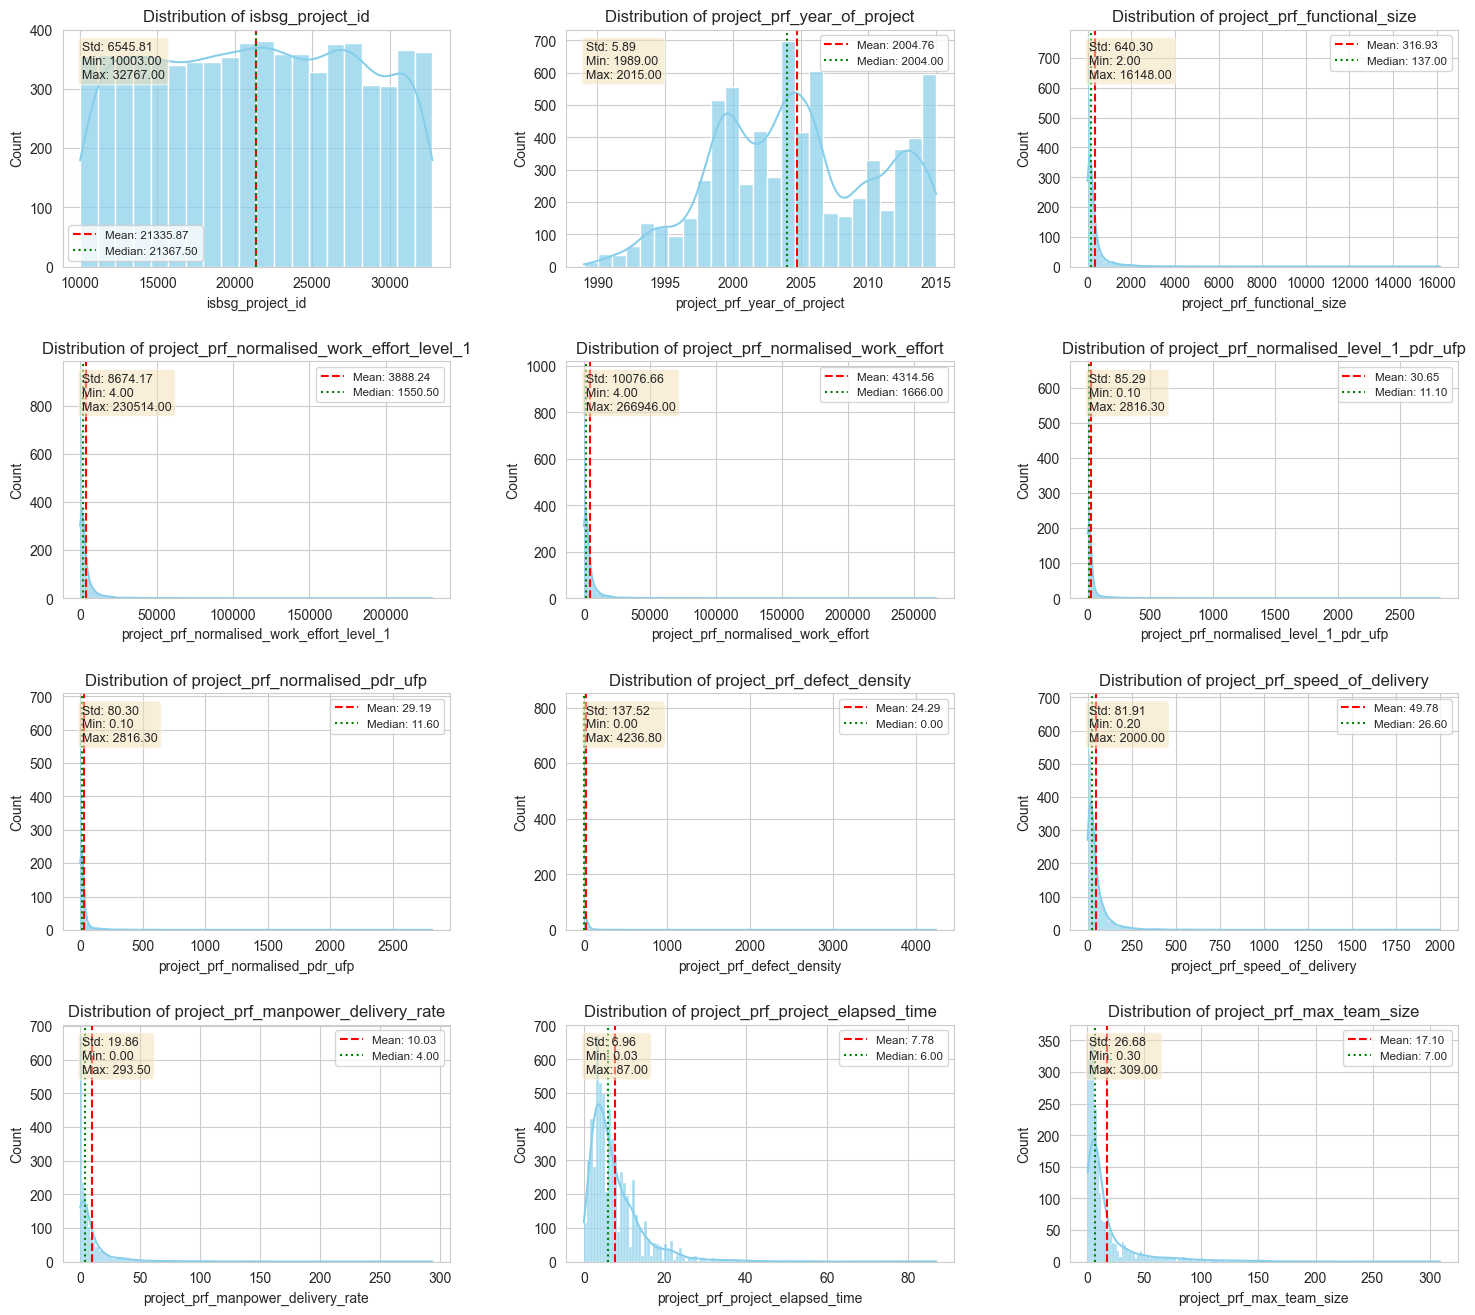

## Correlation Matrix

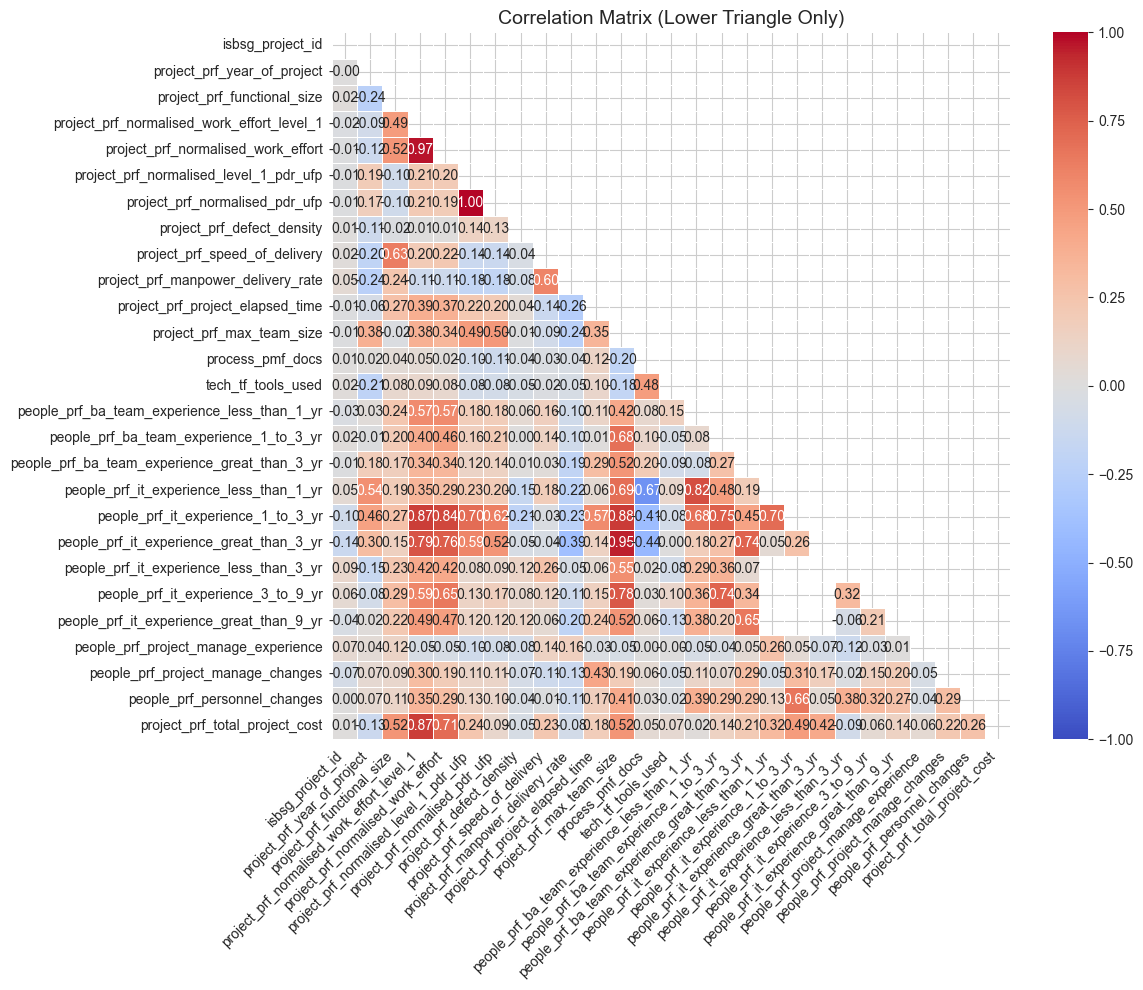

## Top Correlations

project_prf_normalised_work_effort_level_1 — project_prf_normalised_work_effort: 0.97
project_prf_normalised_work_effort — project_prf_normalised_work_effort_level_1: 0.97
people_prf_it_experience_great_than_3_yr — project_prf_max_team_size: 0.95
project_prf_max_team_size — people_prf_it_experience_great_than_3_yr: 0.95
project_prf_max_team_size — people_prf_it_experience_1_to_3_yr: 0.88
people_prf_it_experience_1_to_3_yr — project_prf_max_team_size: 0.88
project_prf_normalised_work_effort_level_1 — project_prf_total_project_cost: 0.87
project_prf_total_project_cost — project_prf_normalised_work_effort_level_1: 0.87
project_prf_normalised_work_effort_level_1 — people_prf_it_experience_1_to_3_yr: 0.87
people_prf_it_experience_1_to_3_yr — project_prf_normalised_work_effort_level_1: 0.87
project_prf_normalised_work_effort — people_prf_it_experience_1_to_3_yr: 0.84
people_prf_it_experience_1_to_3_yr — project_prf_normalised_work_effort: 0.84
people_prf_it_experience_less_than_1_yr — people

C:\Users\jdche\AppData\Local\Temp\ipykernel_12820\14068265.py:160: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


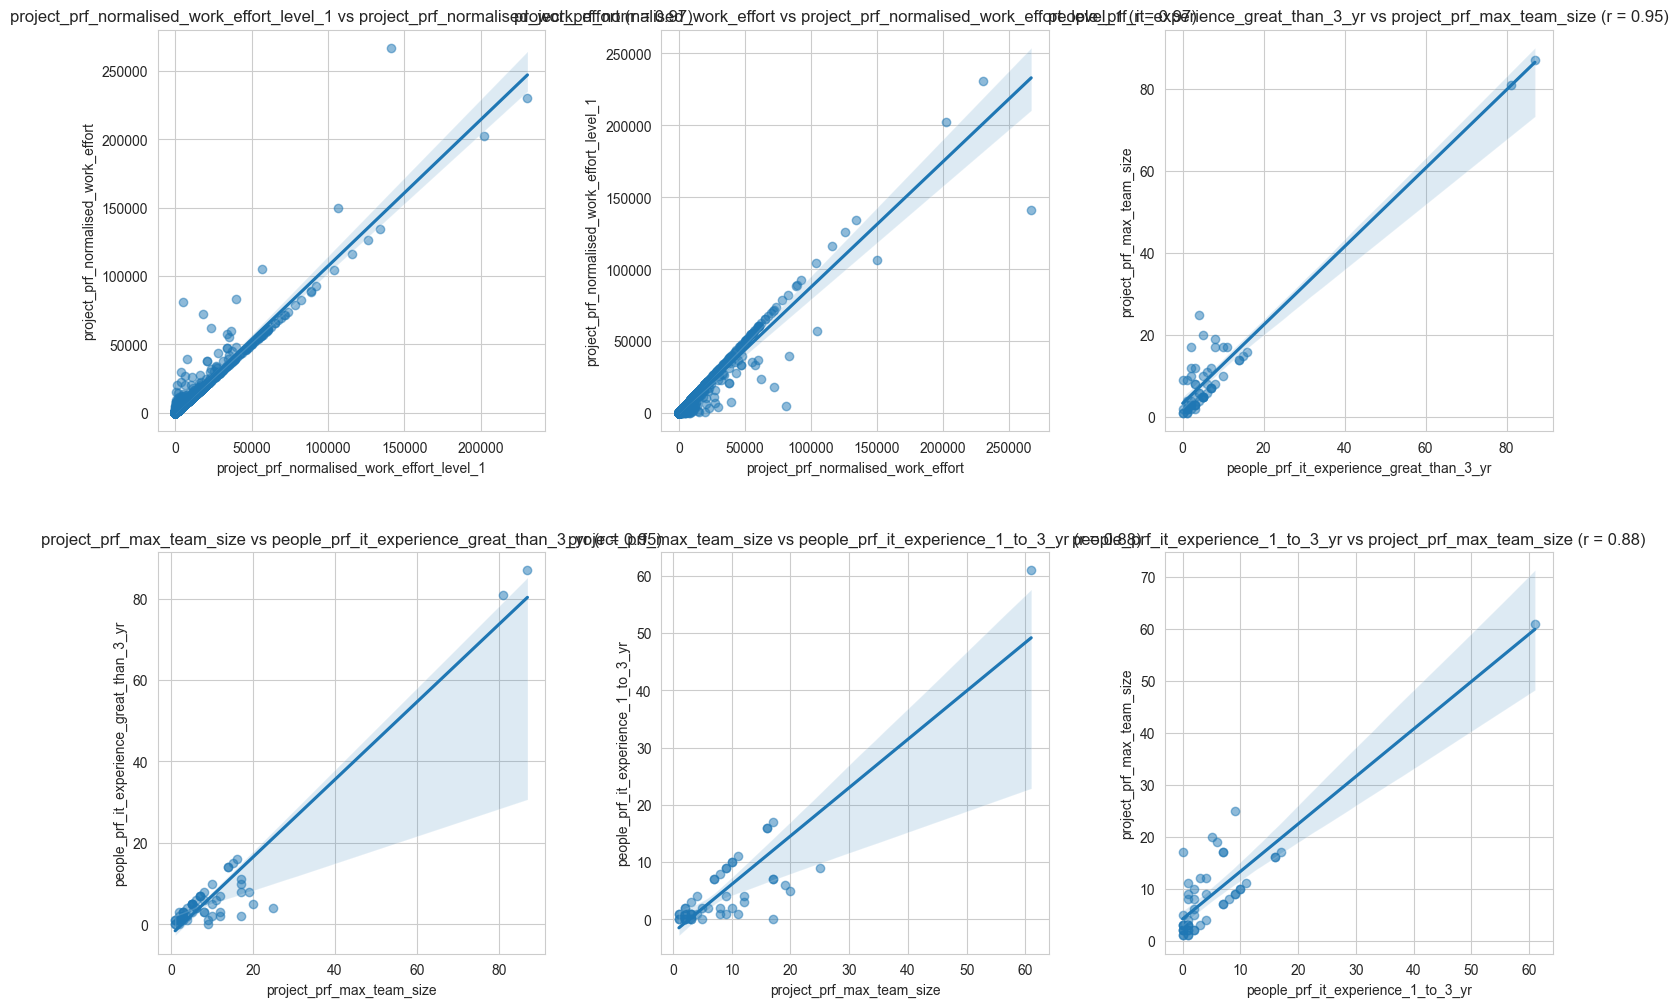

## Categorical Features

C:\Users\jdche\AppData\Local\Temp\ipykernel_12820\14068265.py:182: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.values, y=plot_data.index, ax=ax, palette='viridis')
C:\Users\jdche\AppData\Local\Temp\ipykernel_12820\14068265.py:182: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.values, y=plot_data.index, ax=ax, palette='viridis')
C:\Users\jdche\AppData\Local\Temp\ipykernel_12820\14068265.py:182: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.values, y=plot_data.index, ax=ax, palette='viridis')
C:\Users\jdch

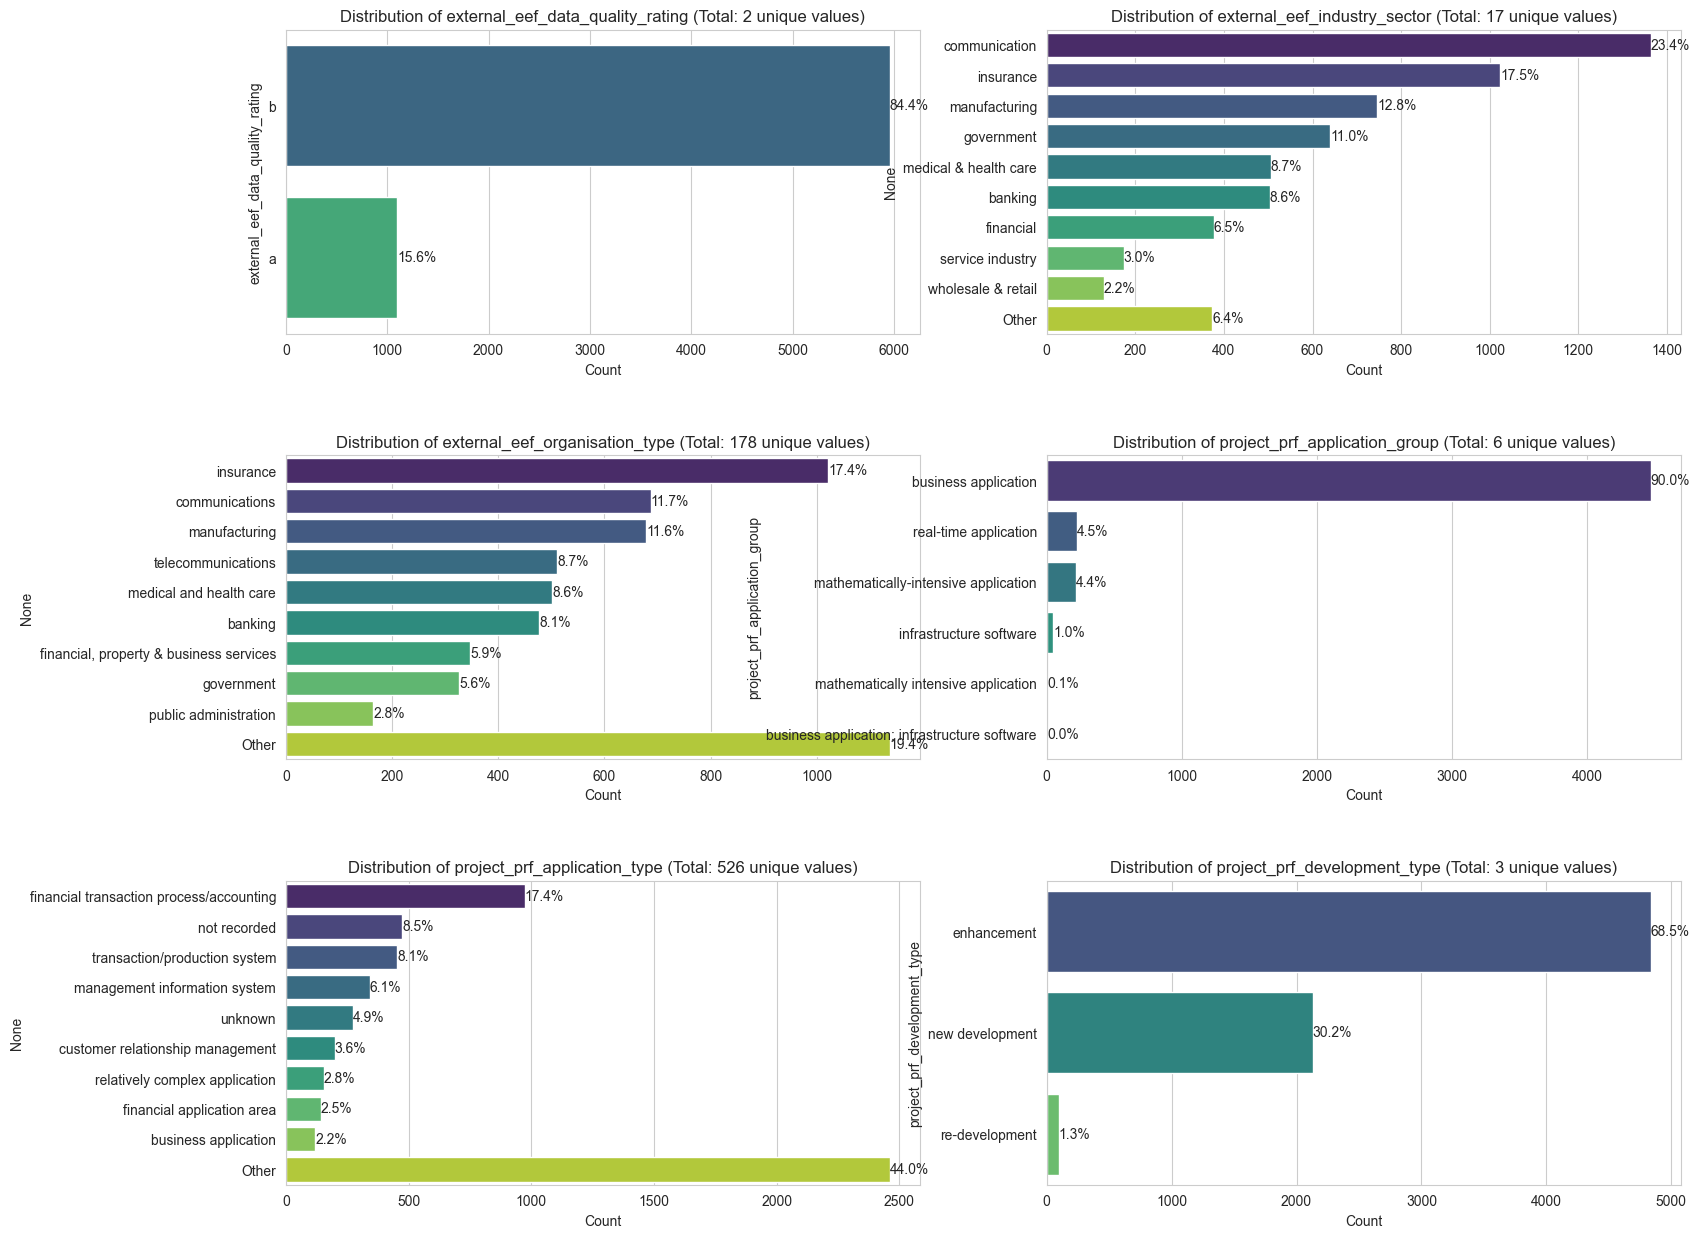

## Categorical-Numerical Relationships

C:\Users\jdche\AppData\Local\Temp\ipykernel_12820\14068265.py:203: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=target_numerical, data=df, ax=ax,
C:\Users\jdche\AppData\Local\Temp\ipykernel_12820\14068265.py:203: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=target_numerical, data=df, ax=ax,
C:\Users\jdche\AppData\Local\Temp\ipykernel_12820\14068265.py:203: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=target_numerical, data=df, ax=ax,
C:\Users\jdche\AppData\Local\Temp\ipykernel_12820\14068265.py:203: 

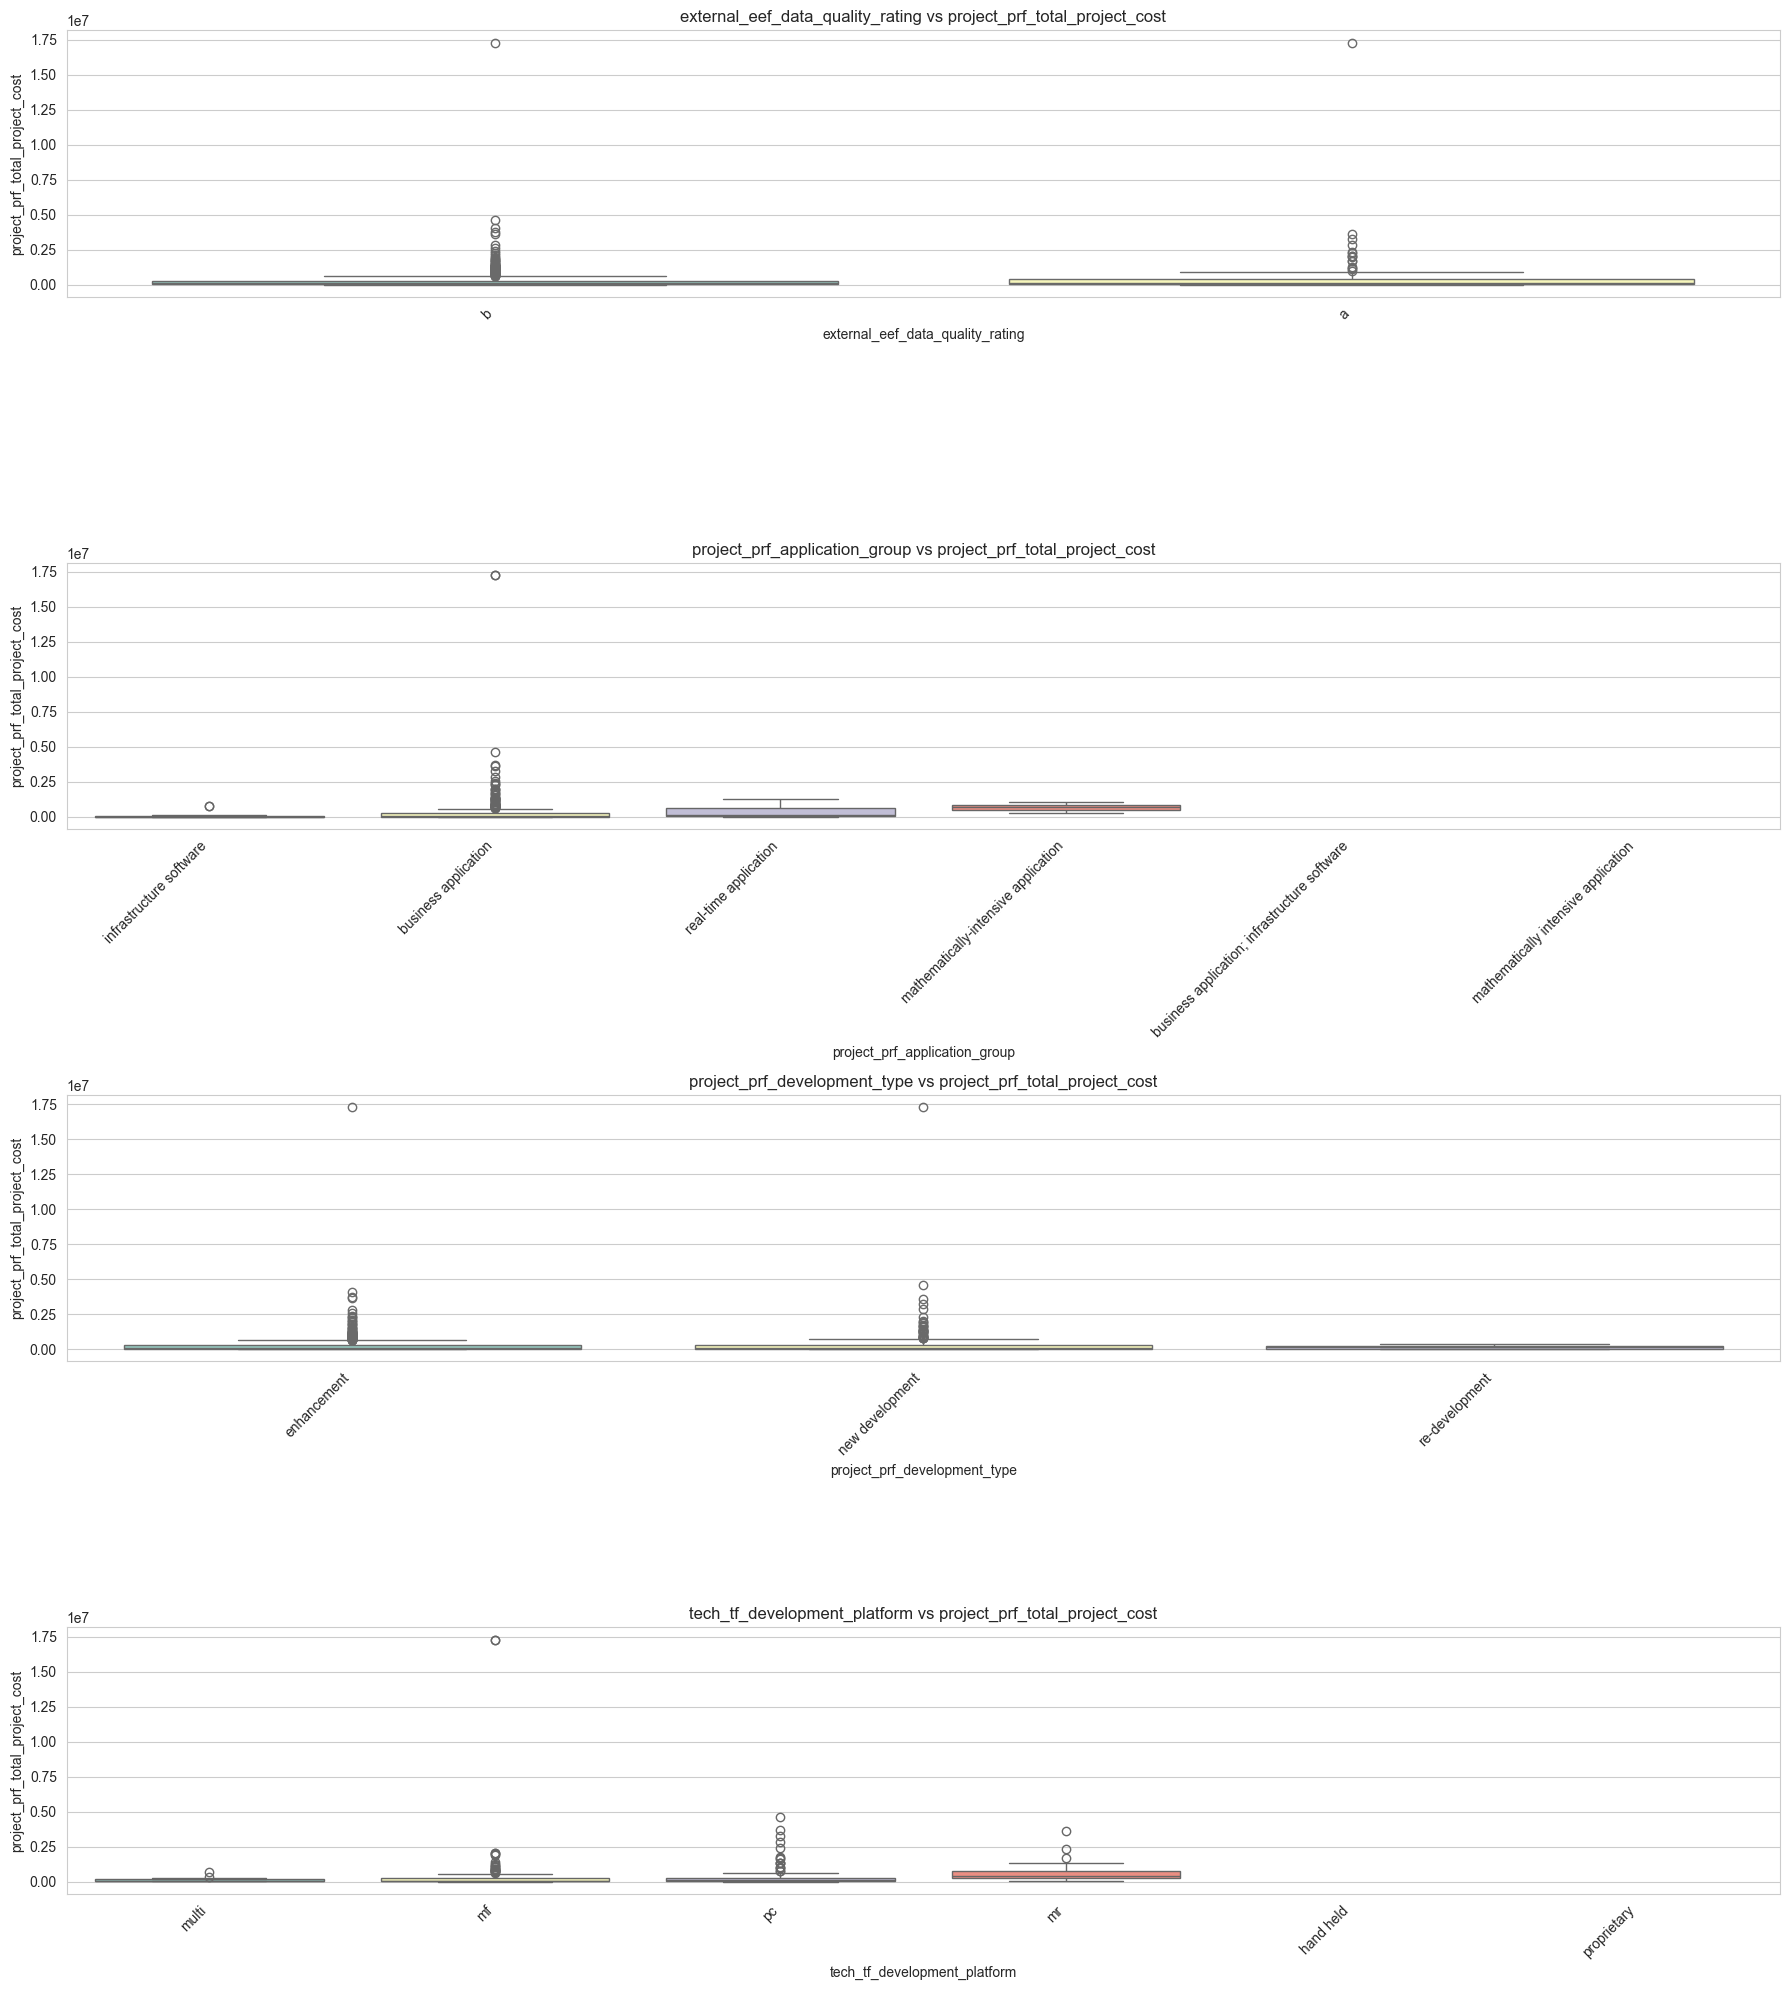

Cell executed at: 2025-05-19 20:49:33.324105


In [6]:
def display_header(text):
    try:
        from IPython.display import display, Markdown
        display(Markdown(f"# {text}"))
    except ImportError:
        print(f"\n=== {text} ===\n")

def display_subheader(text):
    try:
        from IPython.display import display, Markdown
        display(Markdown(f"## {text}"))
    except ImportError:
        print(f"\n-- {text} --\n")

def explore_data(df: pd.DataFrame) -> None:
    """
    Perform exploratory data analysis on the input DataFrame with nicely aligned plots.
    Args:
        df: Input DataFrame
    """
    from IPython.display import display

    display_header("Exploratory Data Analysis")
    
    # Data Overview
    display_subheader("Data Overview")
    print(f"Dataset shape: {df.shape}")
    if df.shape[0] > 20:
        print("First 5 rows:")
        display(df.head())
        print("Last 5 rows:")
        display(df.tail())
    else:
        display(df)
    
    # Duplicate Row Checking
    display_subheader("Duplicate Rows")
    num_duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {num_duplicates}")

    # Data Types and Memory Usage
    display_subheader("Data Types and Memory Usage")
    dtype_info = pd.DataFrame({
        'Data Type': df.dtypes,
        'Memory Usage (MB)': df.memory_usage(deep=True) / 1024 / 1024
    })
    display(dtype_info)
    
    # Unique Values Per Column
    display_subheader("Unique Values Per Column")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")
    
    # Type Conversion Suggestions
    display_subheader("Type Conversion Suggestions")
    potential_cat = [
        col for col in df.select_dtypes(include=['object']).columns
        if df[col].nunique() < max(30, 0.05*df.shape[0])
    ]
    if potential_cat:
        print("Consider converting to 'category' dtype for memory/performance:")
        print(potential_cat)
    else:
        print("No obvious candidates for 'category' dtype conversion.")
    
    # Summary Statistics
    display_subheader("Summary Statistics")
    try:
        display(df.describe(include='all').T.style.background_gradient(cmap='Blues', axis=1))
    except Exception:
        display(df.describe(include='all').T)
    
    # Missing Values
    display_subheader("Missing Values")
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_info = pd.DataFrame({
        'Missing Values': missing,
        'Percentage (%)': missing_percent.round(2)
    })
    if missing.sum() > 0:
        display(missing_info[missing_info['Missing Values'] > 0]
                .sort_values('Missing Values', ascending=False)
                .style.background_gradient(cmap='Reds'))
        # Visualize missing values
        plt.figure(figsize=(12, 6))
        cols_with_missing = missing_info[missing_info['Missing Values'] > 0].index
        if len(cols_with_missing) > 0:
            sns.heatmap(df[cols_with_missing].isnull(), 
                        cmap='viridis', 
                        yticklabels=False, 
                        cbar_kws={'label': 'Missing Values'})
            plt.title('Missing Value Patterns')
            plt.tight_layout()
            plt.show()
    else:
        print("No missing values in the dataset.")
    
    # Numerical Distributions
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if len(numerical_cols) > 0:
        display_subheader("Distribution of Numerical Features")
        sample_cols = numerical_cols[:min(12, len(numerical_cols))]
        num_cols = len(sample_cols)
        num_rows = (num_cols + 2) // 3  # 3 plots per row, rounded up
        fig = plt.figure(figsize=(18, num_rows * 4))
        grid = plt.GridSpec(num_rows, 3, figure=fig, hspace=0.4, wspace=0.3)
        for i, col in enumerate(sample_cols):
            row, col_pos = divmod(i, 3)
            ax = fig.add_subplot(grid[row, col_pos])
            sns.histplot(df[col].dropna(), kde=True, ax=ax, color='skyblue', alpha=0.7)
            mean_val = df[col].mean()
            median_val = df[col].median()
            ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
            ax.axvline(median_val, color='green', linestyle=':', label=f'Median: {median_val:.2f}')
            stats_text = (f"Std: {df[col].std():.2f}\n"
                          f"Min: {df[col].min():.2f}\n"
                          f"Max: {df[col].max():.2f}")
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=9,
                    verticalalignment='top', bbox=props)
            ax.set_title(f'Distribution of {col}')
            ax.legend(fontsize='small')
        plt.tight_layout()
        plt.show()
        # Correlation matrix and top correlations
        if len(numerical_cols) > 1:
            display_subheader("Correlation Matrix")
            corr = df[numerical_cols].corr().round(2)
            mask = np.triu(np.ones_like(corr, dtype=bool))
            plt.figure(figsize=(12, 10))
            sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', 
                        fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, 
                        annot_kws={"size": 10})
            plt.title('Correlation Matrix (Lower Triangle Only)', fontsize=14)
            plt.xticks(rotation=45, ha='right', fontsize=10)
            plt.yticks(fontsize=10)
            plt.tight_layout()
            plt.show()
            # Top correlations
            if len(numerical_cols) > 5:
                corr_unstack = corr.unstack()
                corr_abs = corr_unstack.apply(abs)
                corr_abs = corr_abs[corr_abs < 1.0]
                highest_corrs = corr_abs.sort_values(ascending=False).head(15)
                display_subheader("Top Correlations")
                for (col1, col2), corr_val in highest_corrs.items():
                    actual_val = corr.loc[col1, col2]
                    print(f"{col1} — {col2}: {actual_val:.2f}")
                pairs_to_plot = [(idx[0], idx[1]) for idx in highest_corrs.index][:6]
                if pairs_to_plot:
                    fig = plt.figure(figsize=(18, 12))
                    grid = plt.GridSpec(2, 3, figure=fig, hspace=0.3, wspace=0.3)
                    for i, (col1, col2) in enumerate(pairs_to_plot):
                        row, col_pos = divmod(i, 3)
                        ax = fig.add_subplot(grid[row, col_pos])
                        sns.regplot(x=df[col1], y=df[col2], ax=ax, scatter_kws={'alpha':0.5})
                        r_value = df[col1].corr(df[col2])
                        ax.set_title(f'{col1} vs {col2} (r = {r_value:.2f})')
                    plt.tight_layout()
                    plt.show()
    # Categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if len(categorical_cols) > 0:
        display_subheader("Categorical Features")
        sample_cat_cols = categorical_cols[:min(6, len(categorical_cols))]
        num_cat_cols = len(sample_cat_cols)
        num_cat_rows = (num_cat_cols + 1) // 2
        fig = plt.figure(figsize=(18, num_cat_rows * 5))
        grid = plt.GridSpec(num_cat_rows, 2, figure=fig, hspace=0.4, wspace=0.2)
        for i, col in enumerate(sample_cat_cols):
            row, col_pos = divmod(i, 2)
            ax = fig.add_subplot(grid[row, col_pos])
            value_counts = df[col].value_counts().sort_values(ascending=False)
            top_n = min(10, len(value_counts))
            if len(value_counts) > top_n:
                top_values = value_counts.head(top_n-1)
                other_count = value_counts.iloc[top_n-1:].sum()
                plot_data = pd.concat([top_values, pd.Series({'Other': other_count})])
            else:
                plot_data = value_counts
            sns.barplot(x=plot_data.values, y=plot_data.index, ax=ax, palette='viridis')
            ax.set_title(f'Distribution of {col} (Total: {len(value_counts)} unique values)')
            ax.set_xlabel('Count')
            total = plot_data.sum()
            for j, v in enumerate(plot_data.values):
                percentage = v / total * 100
                ax.text(v + 0.1, j, f'{percentage:.1f}%', va='center')
        plt.tight_layout()
        plt.show()
        # Categorical-numerical boxplots
        if numerical_cols and len(categorical_cols) > 0:
            display_subheader("Categorical-Numerical Relationships")
            numerical_variances = df[numerical_cols].var()
            target_numerical = numerical_variances.idxmax()
            sample_cat_for_box = [col for col in categorical_cols 
                                  if df[col].nunique() <= 15][:4]
            if sample_cat_for_box:
                fig = plt.figure(figsize=(18, 5 * len(sample_cat_for_box)))
                for i, cat_col in enumerate(sample_cat_for_box):
                    ax = fig.add_subplot(len(sample_cat_for_box), 1, i+1)
                    order = df.groupby(cat_col)[target_numerical].median().sort_values().index
                    sns.boxplot(x=cat_col, y=target_numerical, data=df, ax=ax, 
                                order=order, palette='Set3')
                    ax.set_title(f'{cat_col} vs {target_numerical}')
                    ax.set_xlabel(cat_col)
                    ax.set_ylabel(target_numerical)
                    plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()

# Exploratory Data Analysis
explore_data(df)


In [7]:
# Clean column names function
def clean_column_names(columns):
    cleaned_cols = []
    for col in columns:
        # First replace ampersands with _&_ to match PyCaret's transformation
        col_clean = col.replace(' & ', '_&_')
        # Then remove any remaining special chars
        col_clean = re.sub(r'[^\w\s&]', '', col_clean)
        # Finally replace spaces with underscores
        col_clean = col_clean.replace(' ', '_')
        cleaned_cols.append(col_clean)
    return cleaned_cols

# Clean column names
original_columns = df.columns.tolist()  # Save original column names for reference
df.columns = clean_column_names(df.columns)

Cell executed at: 2025-05-19 20:49:33.339797


In [8]:
# Create a mapping from original to cleaned column names
column_mapping = dict(zip(original_columns, df.columns))
print("\nColumn name mapping (original -> cleaned):")
for orig, clean in column_mapping.items():
    if orig != clean:  # Only show columns that changed
        print(f"  '{orig}' -> '{clean}'")



Column name mapping (original -> cleaned):
Cell executed at: 2025-05-19 20:49:33.356844


In [9]:
# Create a function to get comprehensive data summary
def get_data_summary(df, n_unique_samples=5):
    """
    Generate a comprehensive summary of the dataframe.
    
    Args:
        df: Pandas DataFrame
        n_unique_samples: Number of unique values to show as sample
        
    Returns:
        DataFrame with summary information
    """
    # Summary dataframe with basic info
    summary = pd.DataFrame({
        'Feature': df.columns,
        'data_type': df.dtypes.values,
        'Null_number': df.isnull().sum().values,
        'Null_pct': (df.isnull().mean() * 100).values,
        'Unique_counts': df.nunique().values,
        'unique_samples': [list(df[col].dropna().unique()[:n_unique_samples]) for col in df.columns]
    })
    
    return summary

# Generate and display data summary
summary_df = get_data_summary(df)
print("\nData Summary (first 10 columns):")
print(summary_df.head(10))



Data Summary (first 10 columns):
                            Feature data_type  Null_number   Null_pct  \
0                  isbsg_project_id     int64            0   0.000000   
1  external_eef_data_quality_rating    object            0   0.000000   
2       project_prf_year_of_project     int64            0   0.000000   
3      external_eef_industry_sector    object         1222  17.313687   
4    external_eef_organisation_type    object         1205  17.072825   
5     project_prf_application_group    object         2096  29.696798   
6      project_prf_application_type    object         1467  20.784925   
7      project_prf_development_type    object            0   0.000000   
8      tech_tf_development_platform    object         1860  26.353075   
9             tech_tf_language_type    object         1292  18.305469   

   Unique_counts                                     unique_samples  
0           7055                [10003, 10011, 10012, 10014, 10015]  
1              2      

In [10]:
# Identify target column
target_col = 'project_prf_normalised_work_effort'
print(f"\nTarget variable: '{target_col}'")


Target variable: 'project_prf_normalised_work_effort'
Cell executed at: 2025-05-19 20:49:33.465273


[Back to top](#Index:)

<a id='part2'></a>

# Part 2 - Data Cleaning and Preprocessing

Here, data cleaning tasks like handling missing values and providing a detailed summary of each feature, including its type, number of unique values, and a preview of unique values, are performed.

In [11]:
# Analyse missing values
print("\nAnalysing missing values...")
missing_pct = df.isnull().mean() * 100
missing_sorted = missing_pct.sort_values(ascending=False)
print("Top 10 columns with highest missing percentages:")
print(missing_sorted.head(10))


Analysing missing values...
Top 10 columns with highest missing percentages:
people_prf_it_experience_less_than_1_yr         99.192406
people_prf_it_experience_1_to_3_yr              99.036554
people_prf_it_experience_great_than_3_yr        98.838198
tech_tf_client_roles                            96.217059
people_prf_it_experience_less_than_3_yr         96.132049
people_prf_ba_team_experience_less_than_1_yr    96.117880
tech_tf_client_server                           96.047039
people_prf_ba_team_experience_1_to_3_yr         95.834514
people_prf_it_experience_great_than_9_yr        95.792009
people_prf_it_experience_3_to_9_yr              95.168603
dtype: float64
Cell executed at: 2025-05-19 20:49:33.491891


In [12]:
# Identify columns with high missing values (>70%)
high_missing_cols = missing_pct[missing_pct > 70].index.tolist()
print(f"\nColumns with >70% missing values ({len(high_missing_cols)} columns):")
for col in high_missing_cols[:5]:  # Show first 5
    print(f"  - {col}: {missing_pct[col]:.2f}% missing")
if len(high_missing_cols) > 5:
    print(f"  - ... and {len(high_missing_cols) - 5} more columns")


Columns with >70% missing values (24 columns):
  - project_prf_defect_density: 79.40% missing
  - project_prf_manpower_delivery_rate: 71.39% missing
  - process_pmf_prototyping_used: 85.62% missing
  - tech_tf_client_server: 96.05% missing
  - tech_tf_client_roles: 96.22% missing
  - ... and 19 more columns
Cell executed at: 2025-05-19 20:49:33.510604


In [13]:
# Create a clean dataframe by dropping high-missing columns
df_clean = df.drop(columns=high_missing_cols)
print(f"\nData shape after dropping high-missing columns: {df_clean.shape}")
print(f"\nHigh missing columns got dropped are: {high_missing_cols}")

# Numerical columns
num_cols = df_clean.select_dtypes(include=['number']).columns.tolist()
print("\nNumerical columns:")
print(num_cols)

# Categorical columns (object or category dtype)
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nCategorical columns:")
print(cat_cols)




Data shape after dropping high-missing columns: (7058, 27)

High missing columns got dropped are: ['project_prf_defect_density', 'project_prf_manpower_delivery_rate', 'process_pmf_prototyping_used', 'tech_tf_client_server', 'tech_tf_client_roles', 'tech_tf_server_roles', 'tech_tf_type_of_server', 'tech_tf_web_development', 'people_prf_project_user_involvement', 'people_prf_ba_team_experience_less_than_1_yr', 'people_prf_ba_team_experience_1_to_3_yr', 'people_prf_ba_team_experience_great_than_3_yr', 'people_prf_it_experience_less_than_1_yr', 'people_prf_it_experience_1_to_3_yr', 'people_prf_it_experience_great_than_3_yr', 'people_prf_it_experience_less_than_3_yr', 'people_prf_it_experience_3_to_9_yr', 'people_prf_it_experience_great_than_9_yr', 'people_prf_project_manage_experience', 'people_prf_project_manage_changes', 'people_prf_personnel_changes', 'project_prf_total_project_cost', 'project_prf_cost_currency', 'project_prf_currency_multiple']

Numerical columns:
['isbsg_project_id',

In [14]:
# Handle remaining missing values
print("\nHandling remaining missing values...")


Handling remaining missing values...
Cell executed at: 2025-05-19 20:49:33.543470


In [15]:
# Fill missing values in categorical columns with "Missing"
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df_clean[col].fillna('Missing', inplace=True)

Cell executed at: 2025-05-19 20:49:33.579220


C:\Users\jdche\AppData\Local\Temp\ipykernel_12820\2158673072.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna('Missing', inplace=True)


In [16]:
# Check remaining missing values
remaining_missing = df_clean.isnull().sum()
remaining_missing_count = sum(remaining_missing > 0)
print(f"\nColumns with remaining missing values: {remaining_missing_count}")
if remaining_missing_count > 0:
    print("Top columns with missing values:")
    print(remaining_missing[remaining_missing > 0].sort_values(ascending=False).head())


Columns with remaining missing values: 8
Top columns with missing values:
project_prf_max_team_size                 4817
tech_tf_tools_used                        2618
project_prf_normalised_level_1_pdr_ufp    1648
project_prf_speed_of_delivery             1619
project_prf_functional_size                908
dtype: int64
Cell executed at: 2025-05-19 20:49:33.609917


In [17]:
# Verify target variable
print(f"\nTarget variable '{target_col}' summary:")
print(f"Unique values: {df[target_col].nunique()}")
print(f"Missing values: {df[target_col].isnull().sum()}")
print(f"Top value counts:")
print(df_clean[target_col].value_counts().head())



Target variable 'project_prf_normalised_work_effort' summary:
Unique values: 4214
Missing values: 0
Top value counts:
project_prf_normalised_work_effort
995    9
304    9
620    9
473    9
62     9
Name: count, dtype: int64
Cell executed at: 2025-05-19 20:49:33.625004


In [18]:
# Check for infinite values
inf_check = np.isinf(df_clean.select_dtypes(include=[np.number])).sum().sum()
print(f"\nNumber of infinite values: {inf_check}")


Number of infinite values: 0
Cell executed at: 2025-05-19 20:49:33.642987


In [19]:
# Save cleaned data

file_name_no_ext

df_clean.to_csv(f'../data/{file_name_no_ext}_dropped.csv', index=False)
print(f'../data/{file_name_no_ext}_dropped.csv')


../data/ISBSG2016R1_1_FormattedForCSV_cleaned_dropped.csv
Cell executed at: 2025-05-19 20:49:33.790315


[Back to top](#Index:)

<a id='part3'></a>

# Part 3 - Feature Correlation Analysis

xxx


Running feature correlation and multicollinearity analysis...
Numeric columns before cleaning: ['isbsg_project_id', 'project_prf_year_of_project', 'project_prf_functional_size', 'project_prf_normalised_work_effort_level_1', 'project_prf_normalised_work_effort', 'project_prf_normalised_level_1_pdr_ufp', 'project_prf_normalised_pdr_ufp', 'project_prf_speed_of_delivery', 'project_prf_project_elapsed_time', 'project_prf_max_team_size', 'process_pmf_docs', 'tech_tf_tools_used']
Rows before cleaning: 7058
Filled missing values with median (excluding target column).
Dropping high VIF columns: ['project_prf_normalised_pdr_ufp', 'project_prf_normalised_level_1_pdr_ufp', 'isbsg_project_id']
Numeric feature columns after cleaning and dropping high VIF cols: ['project_prf_year_of_project', 'project_prf_functional_size', 'project_prf_normalised_work_effort_level_1', 'project_prf_speed_of_delivery', 'project_prf_project_elapsed_time', 'project_prf_max_team_size', 'process_pmf_docs', 'tech_tf_tools_

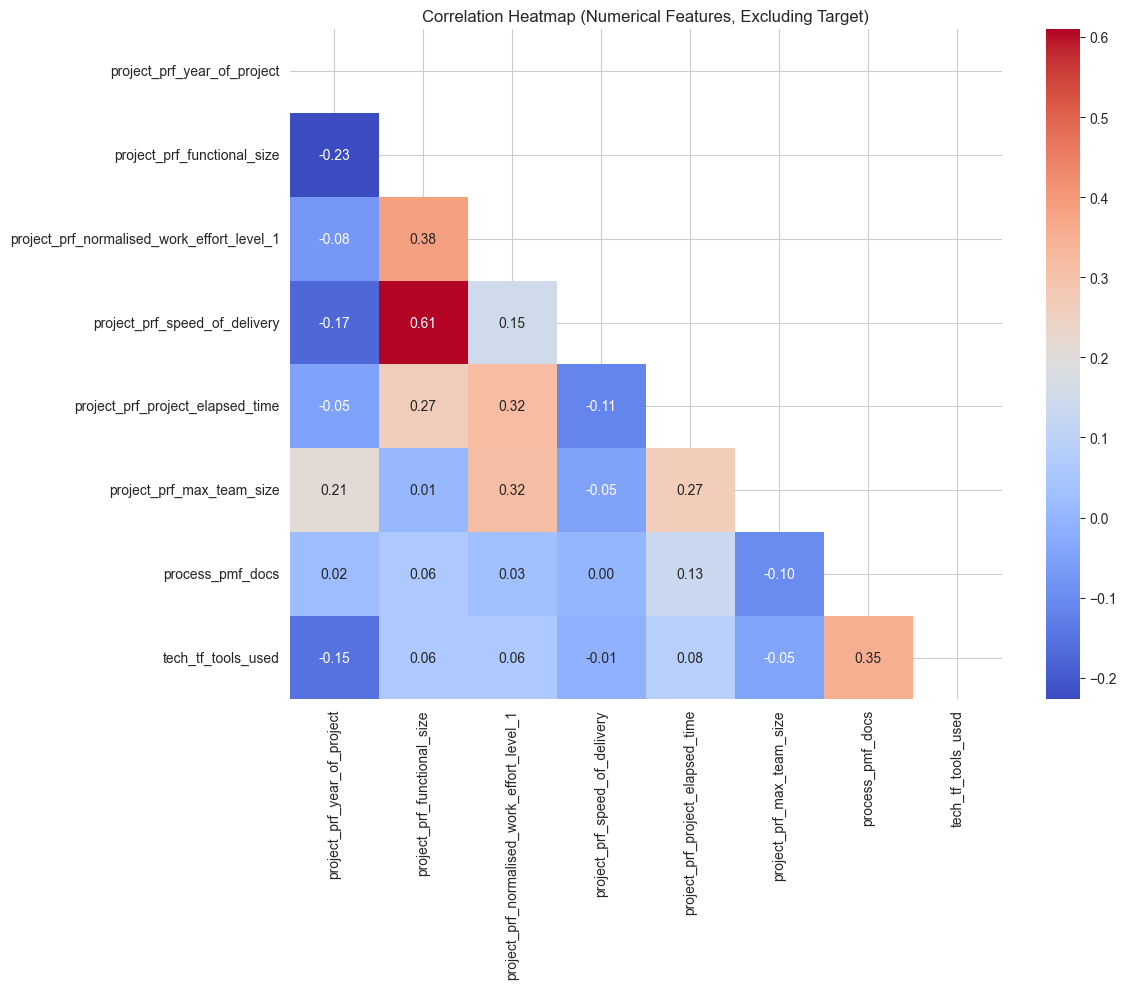


VIF values:
                                      Feature       VIF
0                 project_prf_year_of_project  4.815783
6                            process_pmf_docs  3.353200
4            project_prf_project_elapsed_time  3.247193
1                 project_prf_functional_size  2.660978
3               project_prf_speed_of_delivery  2.527552
5                   project_prf_max_team_size  1.720020
2  project_prf_normalised_work_effort_level_1  1.635835
7                          tech_tf_tools_used  1.338397
Cell executed at: 2025-05-19 20:49:35.018180


In [20]:
# --- Add feature correlation analysis here ---

print("\nRunning feature correlation and multicollinearity analysis...")
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    os.makedirs('plots', exist_ok=True)
    
    # Define your target column name here
    target_col = 'project_prf_normalised_work_effort'
    
    # Use numeric columns for correlation/VIF
    X_num = df_clean.select_dtypes(include=[np.number])
    print("Numeric columns before cleaning:", X_num.columns.tolist())
    print("Rows before cleaning:", X_num.shape[0])

    # Exclude the target column from features
    feature_cols = [col for col in X_num.columns if col != target_col]
    X_num_features = X_num[feature_cols]
    
    # Impute missing numeric values with median for EDA
    X_num_filled = X_num_features.fillna(X_num_features.median())
    print("Filled missing values with median (excluding target column).")

    # Drop columns that are all-NaN or constant (after imputation)
    nunique = X_num_filled.nunique()
    constant_cols = nunique[nunique <= 1].index
    if len(constant_cols) > 0:
        print("Dropping constant columns:", list(constant_cols))
        X_num_filled = X_num_filled.drop(columns=constant_cols)

    # --- Drop high VIF columns here ---
    high_vif_drop = [
        'project_prf_normalised_pdr_ufp',
        'project_prf_normalised_level_1_pdr_ufp',
        'isbsg_project_id',
        'project_prf_total_project_cost',
        'people_prf_personnel_changes'
    ]
    # Only drop if they exist in the columns
    drop_actual = [col for col in high_vif_drop if col in X_num_filled.columns]
    if drop_actual:
        print("Dropping high VIF columns:", drop_actual)
        X_num_filled = X_num_filled.drop(columns=drop_actual)

    print("Numeric feature columns after cleaning and dropping high VIF cols:", X_num_filled.columns.tolist())
    print("Shape after cleaning:", X_num_filled.shape)

    # Compute correlation matrix
    corr_matrix = X_num_filled.corr()

    # Plot correlation heatmap
    if not corr_matrix.empty:
        plt.figure(figsize=(12, 10))
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm')
        plt.title('Correlation Heatmap (Numerical Features, Excluding Target)')
        plt.tight_layout()
        plt.savefig('plots/correlation_heatmap.png')
        plt.show()
        plt.close()
    else:
        print("Correlation matrix is empty after cleaning.")

    # VIF (only if enough samples/features): VIF tells you if a feature is redundant because it can be 
    # “predicted” by other features.
    if X_num_filled.shape[0] > X_num_filled.shape[1] and X_num_filled.shape[1] > 1:
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X_num_filled.columns
        vif_data["VIF"] = [variance_inflation_factor(X_num_filled.values, i) for i in range(X_num_filled.shape[1])]
        print("\nVIF values:")
        print(vif_data.sort_values("VIF", ascending=False))
    else:
        print("Not enough samples to calculate VIF (need more samples than features and at least two features).")

except Exception as e:
    print(f"Feature correlation analysis failed: {e}")



[Back to top](#Index:)

<a id='part4'></a>

# Part 4 - Feature Engineering and Selection

Involves creating or selecting specific features for the model based on insights from EDA, including handling categorical variables and reducing dimensionality if necessary.

In [21]:
# Identify categorical columns and check cardinality
print("\nCategorical columns and their cardinality:")
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols[:5]:  # Show first 5
    print(f"  {col}: {df_clean[col].nunique()} unique values")
if len(cat_cols) > 5:
    print(f"  ... and {len(cat_cols) - 5} more columns")


Categorical columns and their cardinality:
  external_eef_data_quality_rating: 2 unique values
  external_eef_industry_sector: 18 unique values
  external_eef_organisation_type: 179 unique values
  project_prf_application_group: 7 unique values
  project_prf_application_type: 527 unique values
  ... and 10 more columns
Cell executed at: 2025-05-19 20:49:35.046413


In [22]:
# One-hot encode categorical columns with low cardinality (<10 unique values)
low_card_cols = [col for col in cat_cols if df_clean[col].nunique() < 10]
print(f"\nApplying one-hot encoding to {len(low_card_cols)} low-cardinality columns:")
for col in low_card_cols[:5]:  # Show first 5
    print(f"  - {col}")
if len(low_card_cols) > 5:
    print(f"  - ... and {len(low_card_cols) - 5} more columns")



Applying one-hot encoding to 8 low-cardinality columns:
  - external_eef_data_quality_rating
  - project_prf_application_group
  - project_prf_development_type
  - tech_tf_development_platform
  - tech_tf_language_type
  - ... and 3 more columns
Cell executed at: 2025-05-19 20:49:35.069770


In [23]:
# Create encoded dataframe
df_encoded = pd.get_dummies(df_clean, columns=low_card_cols, drop_first=True)
print(f"\nData shape after one-hot encoding: {df_encoded.shape}")
print("\nAll column names:")
print(df_encoded.columns.tolist())



Data shape after one-hot encoding: (7058, 48)

All column names:
['isbsg_project_id', 'project_prf_year_of_project', 'external_eef_industry_sector', 'external_eef_organisation_type', 'project_prf_application_type', 'tech_tf_primary_programming_language', 'project_prf_functional_size', 'project_prf_relative_size', 'project_prf_normalised_work_effort_level_1', 'project_prf_normalised_work_effort', 'project_prf_normalised_level_1_pdr_ufp', 'project_prf_normalised_pdr_ufp', 'project_prf_speed_of_delivery', 'project_prf_project_elapsed_time', 'project_prf_team_size_group', 'project_prf_max_team_size', 'process_pmf_development_methodologies', 'process_pmf_docs', 'tech_tf_tools_used', 'external_eef_data_quality_rating_b', 'project_prf_application_group_business application', 'project_prf_application_group_business application; infrastructure software', 'project_prf_application_group_infrastructure software', 'project_prf_application_group_mathematically intensive application', 'project_prf_a

In [24]:
# MANUALLY fix the problematic column names BEFORE PyCaret setup

# Function to fix the column names and prevent duplicates
def fix_column_names_no_duplicates(df):
    """Fix column names that cause issues with PyCaret while preventing duplicates."""
    original_cols = df.columns.tolist()
    fixed_columns = []
    
    # Track columns to check for duplicates
    seen_columns = set()
    
    for col in original_cols:
        # Replace spaces with underscores
        fixed_col = col.replace(' ', '_')
        # Replace ampersands 
        fixed_col = fixed_col.replace('&', 'and')
        # Remove any other problematic characters
        fixed_col = ''.join(c if c.isalnum() or c == '_' else '_' for c in fixed_col)
        
        # Handle duplicates by appending a suffix
        base_col = fixed_col
        suffix = 1
        while fixed_col in seen_columns:
            fixed_col = f"{base_col}_{suffix}"
            suffix += 1
        
        seen_columns.add(fixed_col)
        fixed_columns.append(fixed_col)
    
    # Create a new DataFrame with fixed column names
    df_fixed = df.copy()
    df_fixed.columns = fixed_columns
    
    # Print statistics about the renaming
    n_changed = sum(1 for old, new in zip(original_cols, fixed_columns) if old != new)
    print(f"Changed {n_changed} column names.")
    
    # Check for duplicates in the new column names
    dup_check = [item for item, count in pd.Series(fixed_columns).value_counts().items() if count > 1]
    if dup_check:
        print(f"WARNING: Found {len(dup_check)} duplicate column names after fixing: {dup_check}")
    else:
        print("No duplicate column names in the fixed DataFrame.")
    
    return df_fixed

# Show some of the original column names to help diagnose issues
print("\nSample of original column names:")
for i, col in enumerate(df_encoded.columns[:15]):  # Show first 15 for diagnosis
    print(f"{i}: {col}")

# Apply the fix to your dataframe
print("\nFixing column names for PyCaret compatibility...")
df_fixed = fix_column_names_no_duplicates(df_encoded)

# Print some example fixed columns to verify
print("\nSample of fixed column names:")
for i, (old, new) in enumerate(zip(df_encoded.columns[:15], df_fixed.columns[:15])):
    print(f"Original: {old} -> Fixed: {new}")


Sample of original column names:
0: isbsg_project_id
1: project_prf_year_of_project
2: external_eef_industry_sector
3: external_eef_organisation_type
4: project_prf_application_type
5: tech_tf_primary_programming_language
6: project_prf_functional_size
7: project_prf_relative_size
8: project_prf_normalised_work_effort_level_1
9: project_prf_normalised_work_effort
10: project_prf_normalised_level_1_pdr_ufp
11: project_prf_normalised_pdr_ufp
12: project_prf_speed_of_delivery
13: project_prf_project_elapsed_time
14: project_prf_team_size_group

Fixing column names for PyCaret compatibility...
Changed 12 column names.
No duplicate column names in the fixed DataFrame.

Sample of fixed column names:
Original: isbsg_project_id -> Fixed: isbsg_project_id
Original: project_prf_year_of_project -> Fixed: project_prf_year_of_project
Original: external_eef_industry_sector -> Fixed: external_eef_industry_sector
Original: external_eef_organisation_type -> Fixed: external_eef_organisation_type
Origin

In [25]:
# Save this DataFrame with fixed column names


df_fixed.to_csv(f'../data/{file_name_no_ext}_fixed_columns_data.csv', index=False)
print(f"Saved data with fixed column names to '../data/{file_name_no_ext}_fixed_columns_data.csv'")

Saved data with fixed column names to '../data/ISBSG2016R1_1_FormattedForCSV_cleaned_fixed_columns_data.csv'
Cell executed at: 2025-05-19 20:49:35.298775


In [26]:
# Create a diagnostic file with all column transformations
with open('../temp/column_transformations.txt', 'w') as f:
    f.write("Column name transformations:\n")
    f.write("--------------------------\n")
    for old, new in zip(df_encoded.columns, df_fixed.columns):
        f.write(f"{old} -> {new}\n")
print("Saved complete column transformations to '../temp/column_transformations.txt'")

Saved complete column transformations to '../temp/column_transformations.txt'
Cell executed at: 2025-05-19 20:49:35.311053


[Back to top](#Index:)

<a id='part4'></a>

# Part 4 - Data Profiling

xxx

In [27]:
# ## Data Profiling (Optional)

try:
    from ydata_profiling import ProfileReport
    
    print("\nGenerating data profile report...")
    profile = ProfileReport(df_clean, title="ISBSG Dataset Profiling Report", minimal=True)
    profile.to_file("data_profile.html")
    print("Data profile report saved to 'data_profile.html'")
except ImportError:
    print("\nSkipping data profiling (ydata_profiling not installed)")
    print("To install: pip install ydata-profiling")


Generating data profile report...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|          | 0/27 [00:00<?, ?it/s]
%|█▊        | 5/27 [00:00<00:00, 38.44it/s]
100%|██████████| 27/27 [00:00<00:00, 89.44it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Data profile report saved to 'data_profile.html'
Cell executed at: 2025-05-19 20:49:58.273900


[Back to top](#Index:)

<a id='part5'></a>

# Part 5 - Model Building with MLJAR

xxx

In [28]:
# Data preparation 

# If you don't have mljar-supervised, run this cell:
# !pip install mljar-supervised

from supervised.automl import AutoML
import pandas as pd
import os

# Specify columns to ignore
ignore_cols = [
    'isbsg_project_id', 'external_eef_data_quality_rating',  'project_prf_normalised_level_1_pdr_ufp', 'project_prf_normalised_pdr_ufp',
    'project_prf_project_elapsed_time', 'people_prf_ba_team_experience_less_than_1_yr', 'people_prf_ba_team_experience_1_to_3_yr',
    'people_prf_ba_team_experience_great_than_3_yr', 'people_prf_it_experience_less_than_1_yr', 'people_prf_it_experience_1_to_3_yr',
    'people_prf_it_experience_great_than_3_yr', 'people_prf_it_experience_less_than_3_yr', 'people_prf_it_experience_3_to_9_yr',
    'people_prf_it_experience_great_than_9_yr', 'people_prf_project_manage_experience', 'project_prf_total_project_cost',
    'project_prf_cost_currency', 'project_prf_currency_multiple', 'project_prf_speed_of_delivery', 'people_prf_project_manage_changes',
    'project_prf_defect_density','project_prf_manpower_delivery_rate'
]

print(f"target_col = {target_col}")
input_cols = [col for col in df_fixed.columns if col not in ignore_cols + [target_col]]

X = df_fixed[input_cols]
y = df_fixed[target_col]

# Create output dirs
os.makedirs('mljar_models', exist_ok=True)
os.makedirs('mljar_results', exist_ok=True)

# MLJAR AutoML setup
automl = AutoML(
    results_path="mljar_models",
    mode="Compete",
    total_time_limit=600,  # 10 minutes for demo; increase for better results
    algorithms=["Random Forest", "LightGBM", "Xgboost", "Linear", "Extra Trees"],  # Aligned with PyCaret's top 3
    train_ensemble=True,
    validation_strategy={"validation_type": "kfold", "k_folds": 10},
    explain_level=2,
    golden_features=False,
    features_selection=False,
    stack_models=True,
    random_state=123
)
automl.fit(X, y)


target_col = project_prf_normalised_work_effort
AutoML directory: mljar_models
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Random Forest', 'LightGBM', 'Xgboost', 'Linear', 'Extra Trees']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'mix_encoding', 'kmeans_features', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step simple_algorithms will try to check up to 1 model
1_Linear rmse 50148620.237881 trained in 73.95 seconds
* Step default_algorithms will try to check up to 4 models
2_Default_LightGBM rmse 4686.486576 trained in 106.76 seconds
* Step not_so_random will try to check up to 36 models
12_LightGBM rmse 5415.516696 trained in 83.38 seconds
3_Xgboost rmse 5493.787517 trained in 39.27 seconds
21_RandomForest rmse 7415.685022 trained in 95.39 seconds
Skip mix_encoding because of the time limit.
Skip kme

AutoML(algorithms=['Random Forest', 'LightGBM', 'Xgboost', 'Linear',
                   'Extra Trees'],
       explain_level=2, features_selection=False, golden_features=False,
       mode='Compete', random_state=123, results_path='mljar_models',
       stack_models=True, total_time_limit=600,
       validation_strategy={'k_folds': 10, 'validation_type': 'kfold'})

Cell executed at: 2025-05-19 21:00:09.958159


In [34]:
import joblib
import os

# Get the internal model dictionary
model_dict = automl._models
print(model_dict.keys())  # Shows all trained model IDs, e.g., '22_LightGBM'

os.makedirs("saved_models", exist_ok=True)

for i, row in enumerate(top3.itertuples(), 1):
    model_id = row.name  # E.g., '22_LightGBM'
    model = automl._models[model_id]  # Get the trained model object directly!
    file_path = f"saved_models/model_{i}_{model_id}.pkl"
    joblib.dump(model, file_path)
    print(f"Saved Model {i} ({model_id}) to {file_path}")


AttributeError: 'list' object has no attribute 'keys'

Cell executed at: 2025-05-19 21:18:12.576391


[Back to top](#Index:)

<a id='part6'></a>

# Part 6 - Feature Importance

xxx

In [30]:
# Train the model

# After training, get the leaderboard with scores
leaderboard = automl.get_leaderboard()
print(leaderboard[['name', 'model_type', 'metric_type', 'metric_value', 'train_time']].head(10))
os.makedirs("../mljar_results", exist_ok=True)
leaderboard.to_csv("../mljar_results/leaderboard.csv", index=False)

# Get the top 3 models by metric value (lower is better for RMSE/MAE; adjust if needed)
top3 = leaderboard.sort_values('metric_value').head(3)

for i, row in enumerate(top3.itertuples(), 1):
    model_id = row.name        # 'name' is the model identifier
    model_type = row.model_type
    metric_value = row.metric_value
    print(f"\nModel {i}: {model_id} ({model_type}) - RMSE: {metric_value}")

    # Get feature importance for this model
    fi_path = os.path.join(automl._results_path, model_id, 'feature_importance.csv')
    if os.path.exists(fi_path):
        fi = pd.read_csv(fi_path)
        print(fi.head(10))
        # Plot
        plt.figure(figsize=(10, 6))
        fi_sorted = fi.sort_values('importance', ascending=False).head(15)
        plt.barh(fi_sorted['feature'], fi_sorted['importance'])
        plt.xlabel('Importance')
        plt.title(f'Feature Importance - {model_id}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.savefig(f'plots/mljar_feature_importance_model_{i}_{model_id}.png')
        plt.show()
        plt.close()
        print(f"Feature importance plot saved for {model_id}")
    else:
        print(f"No feature importance file found for {model_id} at {fi_path}")



                         name     model_type metric_type  metric_value  \
0                    1_Linear         Linear        rmse  5.014862e+07   
1          2_Default_LightGBM       LightGBM        rmse  4.686487e+03   
2                 12_LightGBM       LightGBM        rmse  5.415517e+03   
3                   3_Xgboost        Xgboost        rmse  5.493788e+03   
4             21_RandomForest  Random Forest        rmse  7.415685e+03   
5                 22_LightGBM       LightGBM        rmse  4.686487e+03   
6                    Ensemble       Ensemble        rmse  4.686487e+03   
7  2_Default_LightGBM_Stacked       LightGBM        rmse  5.118172e+03   
8           3_Xgboost_Stacked        Xgboost        rmse  5.400847e+03   
9            Ensemble_Stacked       Ensemble        rmse  4.686487e+03   

   train_time  
0       76.65  
1      109.07  
2       85.17  
3       40.90  
4       98.38  
5      111.53  
6        0.31  
7       40.69  
8       33.39  
9        0.39  

Model 1:

In [33]:
print(leaderboard.columns.tolist())


['name', 'model_type', 'metric_type', 'metric_value', 'train_time']
Cell executed at: 2025-05-19 19:42:47.773574


[Back to top](#Index:)

<a id='part7'></a>

# Part 7 - SHAP Analysis

xxx

In [38]:
print(automl._results_path)

mljar_models
Cell executed at: 2025-05-19 20:21:49.591264


In [37]:
import joblib
import pandas as pd
import shap
import matplotlib.pyplot as plt
import numpy as np
import os

# Example: Load model and X (preprocessed features as DataFrame)
model_path = 'mljar_models/01_LightGBM/model.pkl'
model = joblib.load(model_path)
X = pd.read_csv('your_preprocessed_X.csv')  # You need to provide this

os.makedirs('plots', exist_ok=True)

# Sample data for SHAP (100 rows for speed)
X_sample = X.sample(n=min(100, len(X)), random_state=123)

explainer = shap.TreeExplainer(model)
shap_values = explainer(X_sample)

# SHAP summary plot
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values.values, X_sample, feature_names=X_sample.columns, show=False)
plt.tight_layout()
plt.savefig('plots/shap_summary_lightgbm.png')
plt.close()
print("SHAP summary plot saved.")

# SHAP bar plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values.values, X_sample, feature_names=X_sample.columns, plot_type='bar', show=False)
plt.tight_layout()
plt.savefig('plots/shap_bar_lightgbm.png')
plt.close()
print("SHAP bar plot saved.")


FileNotFoundError: [Errno 2] No such file or directory: 'mljar_models/01_LightGBM/model.pkl'

Cell executed at: 2025-05-19 20:16:19.039842


In [34]:
# Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Check if required packages are installed and install if needed
def check_and_install_packages():
    try:
        import shap
        from pycaret.regression import get_config
        print("All required packages are installed.")
        return True
    except ImportError as e:
        missing_package = str(e).split("'")[1]
        print(f"Missing package: {missing_package}")
        install = input(f"Would you like to install {missing_package}? (y/n): ")
        if install.lower() == 'y':
            import sys
            import subprocess
            subprocess.check_call([sys.executable, "-m", "pip", "install", missing_package])
            print(f"{missing_package} installed successfully.")
            return True
        else:
            print(f"⚠️ Please install {missing_package} to proceed.")
            return False

Cell executed at: 2025-05-18 13:56:51.737842


✅ All required packages are installed.

SHAP Analysis for Model 1
Output directory created: C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots
Successfully retrieved transformed data
   Shape: (85, 123)
   Data types: float64    71
bool       52
Name: count, dtype: int64
   Contains NaN: project_prf_year_of_project                      False
external_eef_industry_sector_service industry    False
external_eef_industry_sector_education           False
external_eef_industry_sector_government          False
external_eef_industry_sector_banking             False
                                                 ...  
tech_tf_client_server_yes                        False
tech_tf_web_development_web                      False
tech_tf_dbms_used_yes                            False
project_prf_cost_currency_canada__dollar         False
project_prf_cost_currency_european__euro         False
Length: 123, dtype: bool
Model identified as: RandomForestRegressor
Data successfully converted t

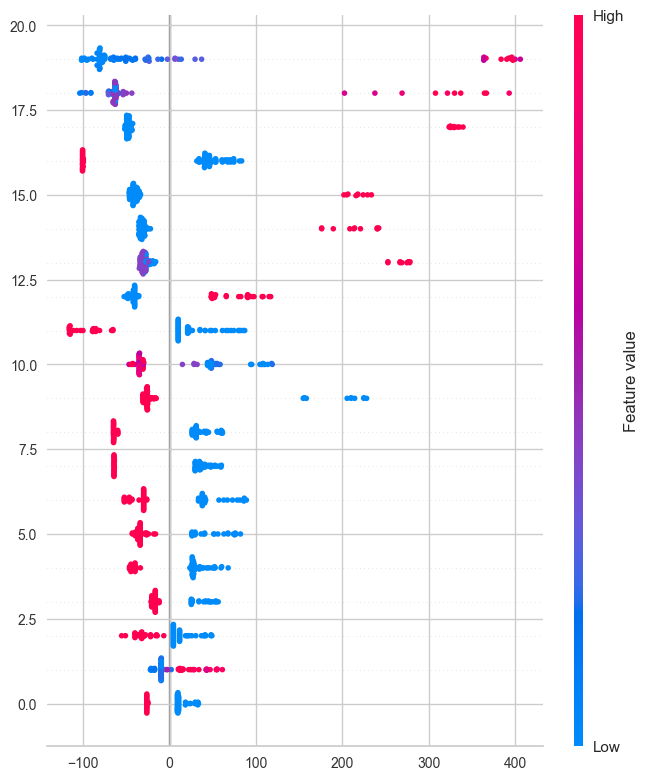

<Figure size 1000x700 with 0 Axes>

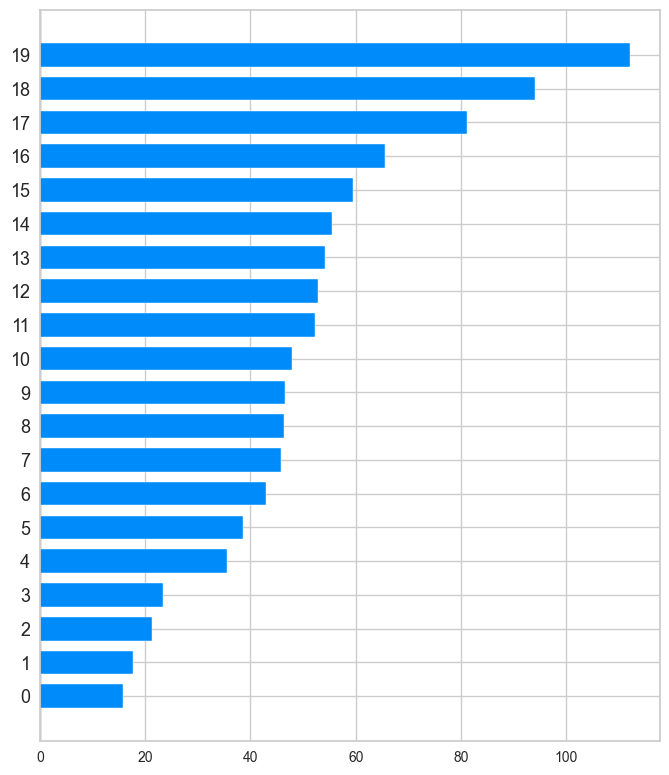

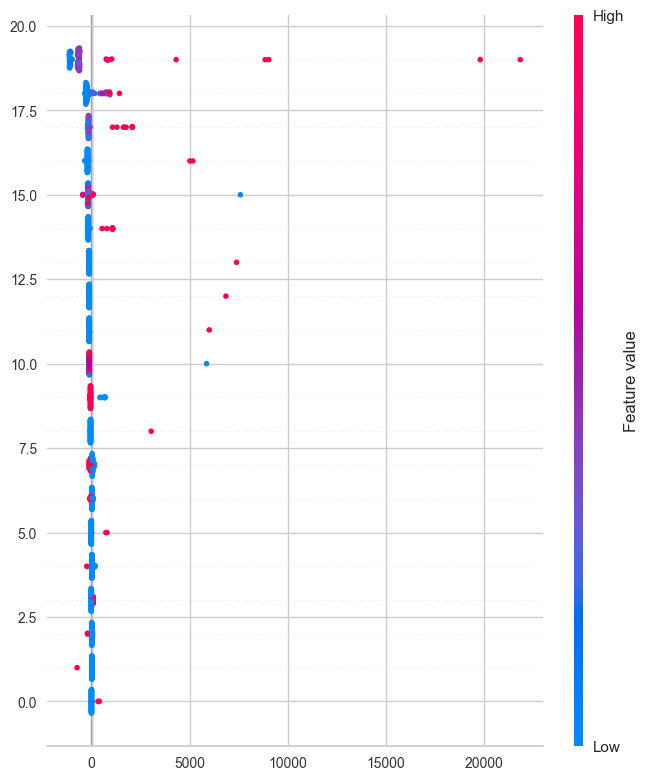

<Figure size 1000x700 with 0 Axes>

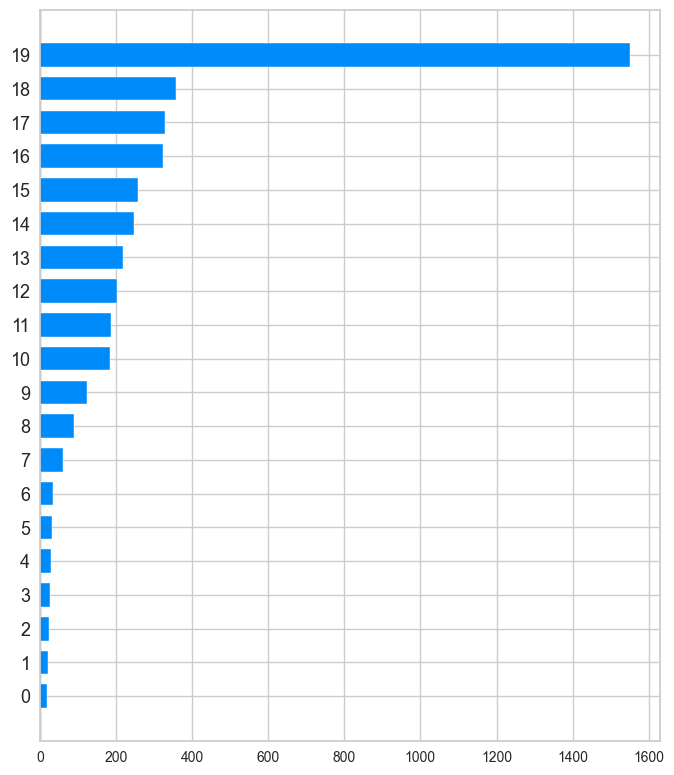

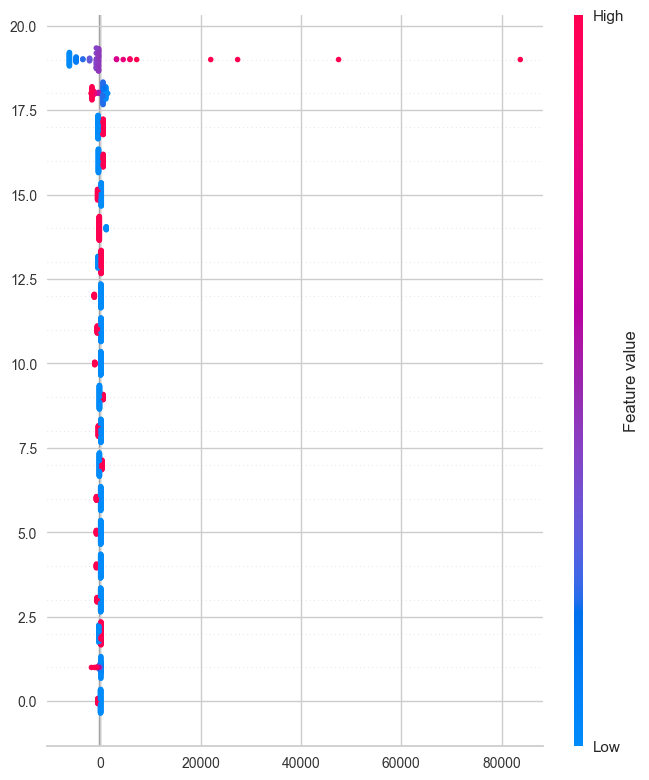

<Figure size 1000x700 with 0 Axes>

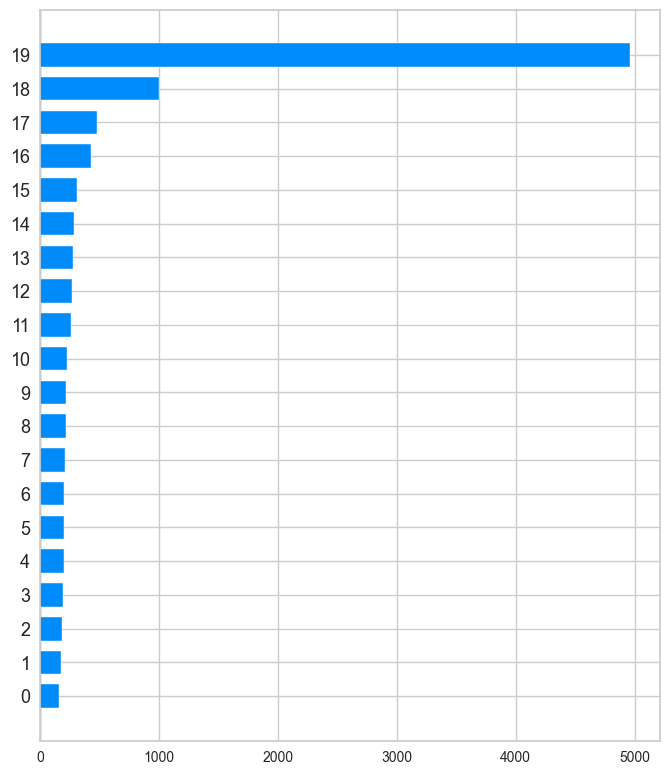

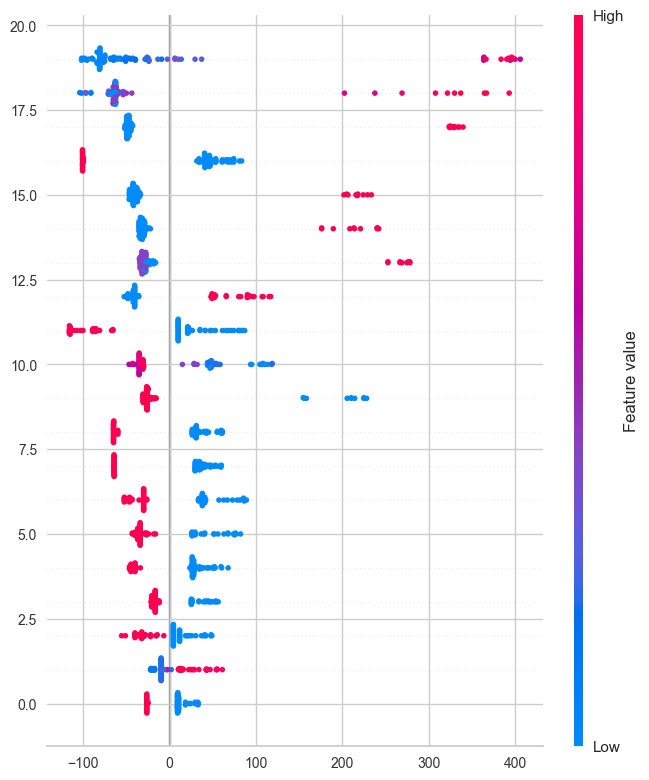

<Figure size 1000x700 with 0 Axes>

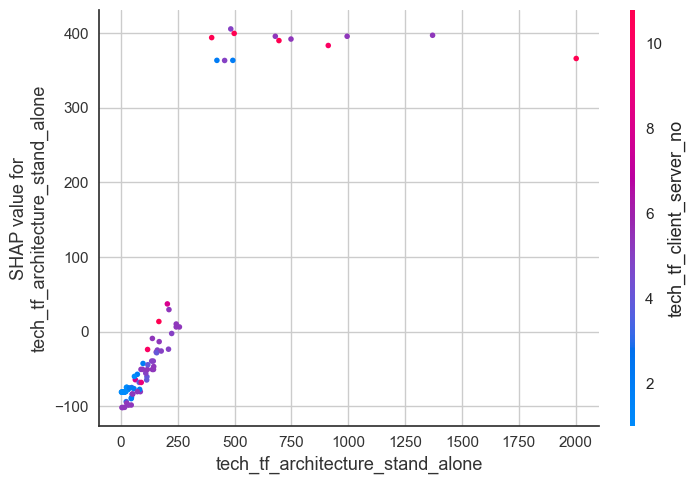

✅ SHAP dependence plot for 'tech_tf_architecture_stand_alone' saved to C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots\shap_dependence_tech_tf_architecture_stand_alone_model1_RandomForestRegressor.png
❌ Error creating bar plot: list index out of range


✅ SHAP force plot saved to C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots\shap_force_model1_RandomForestRegressor.html


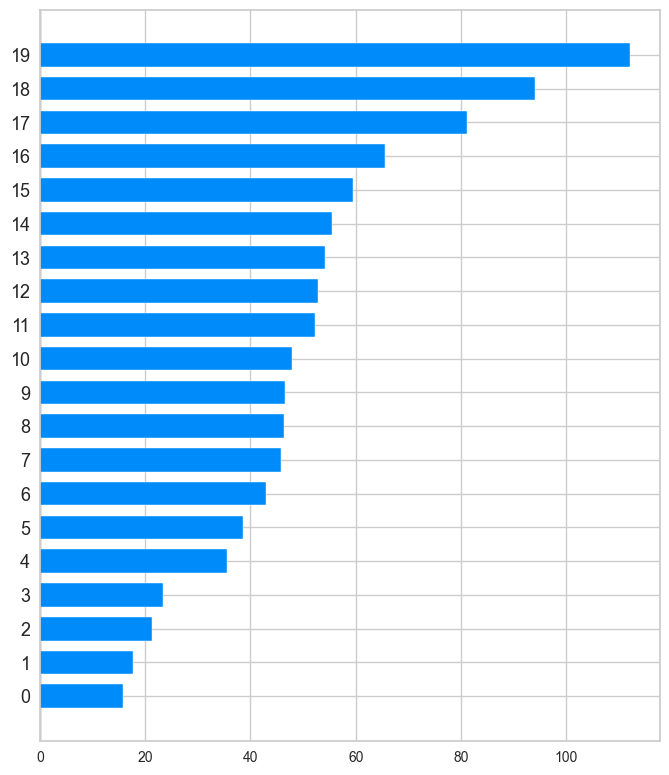

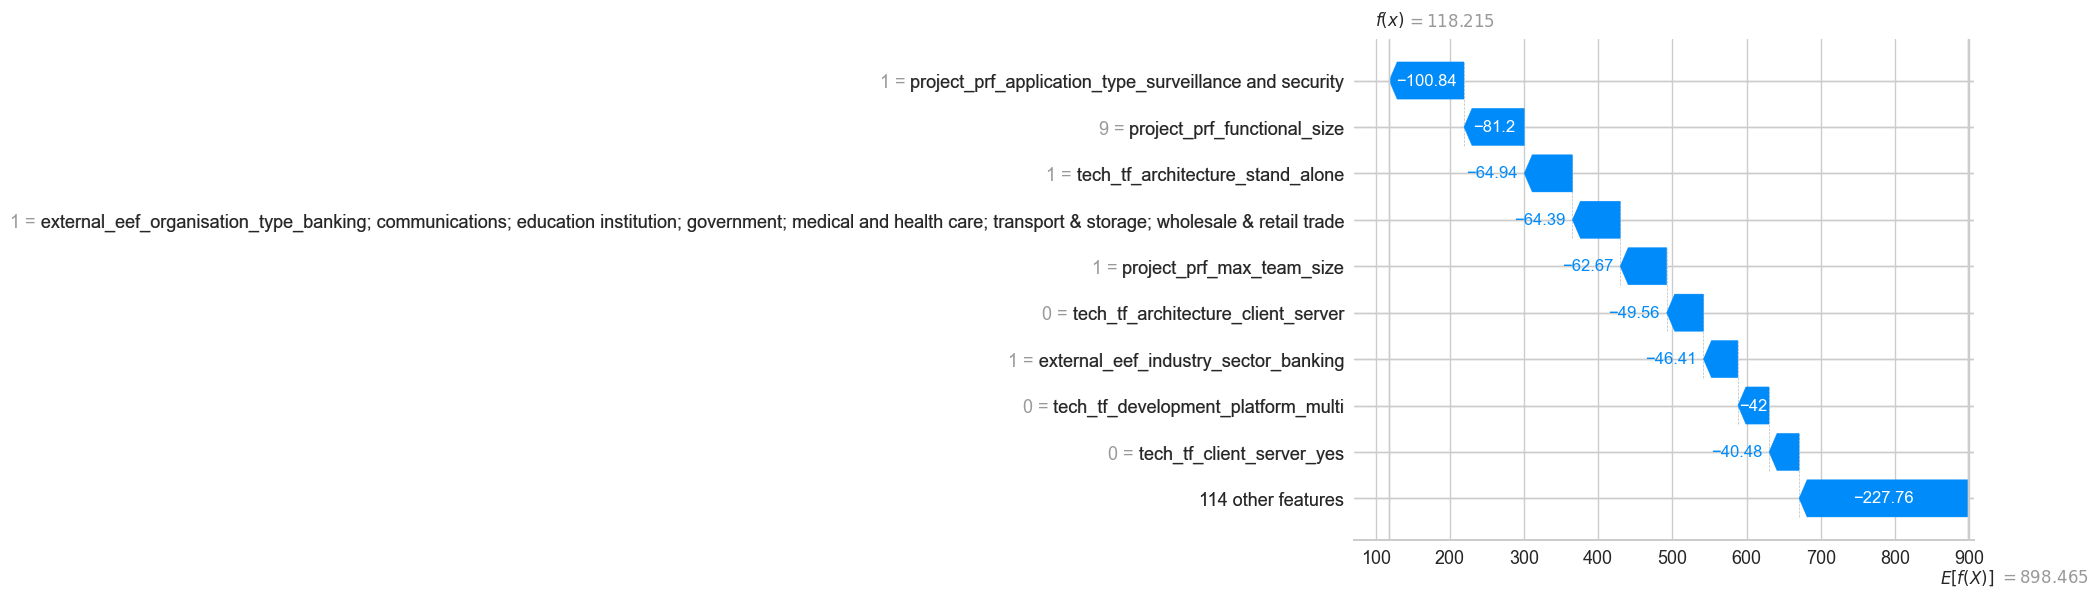

✅ SHAP waterfall plot saved to C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots\shap_waterfall_model1_RandomForestRegressor.png

✅ SHAP analysis completed successfully!

SHAP Analysis for Model 2
Output directory created: C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots
Successfully retrieved transformed data
   Shape: (85, 123)
   Data types: float64    71
bool       52
Name: count, dtype: int64
   Contains NaN: project_prf_year_of_project                      False
external_eef_industry_sector_service industry    False
external_eef_industry_sector_education           False
external_eef_industry_sector_government          False
external_eef_industry_sector_banking             False
                                                 ...  
tech_tf_client_server_yes                        False
tech_tf_web_development_web                      False
tech_tf_dbms_used_yes                            False
project_prf_cost_currency_canada__dollar         False
project_prf

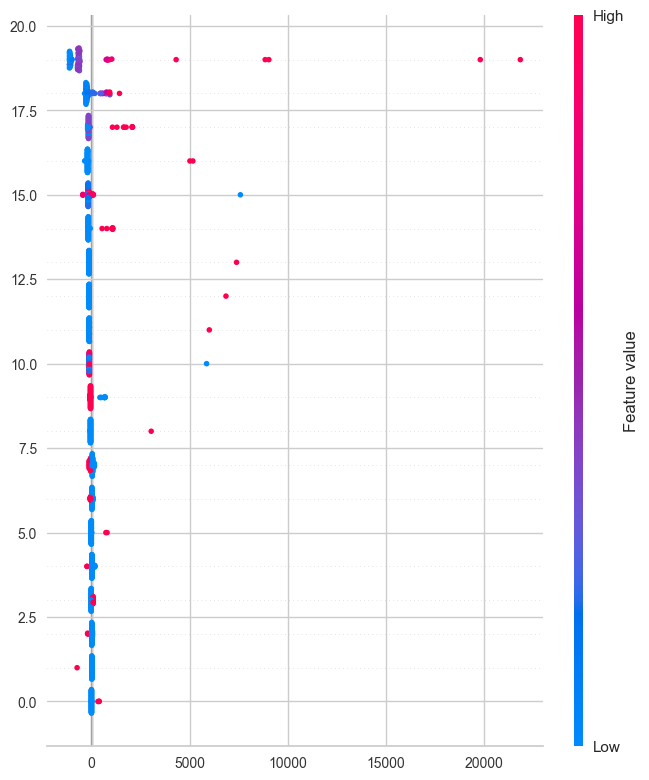

<Figure size 1000x700 with 0 Axes>

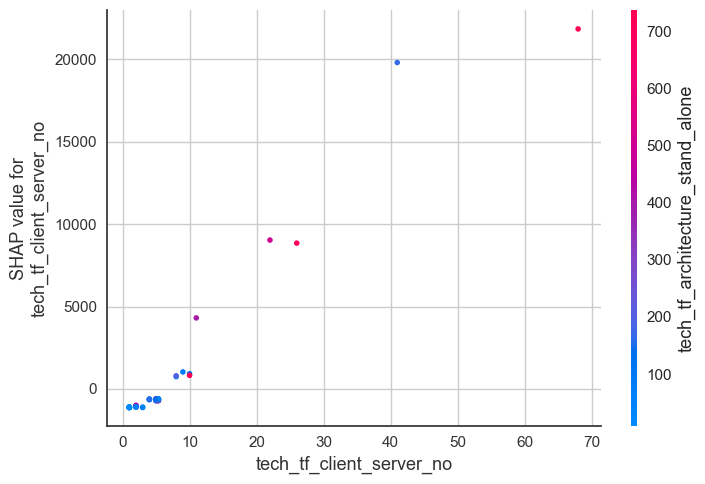

✅ SHAP dependence plot for 'tech_tf_client_server_no' saved to C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots\shap_dependence_tech_tf_client_server_no_model2_GradientBoostingRegressor.png
❌ Error creating bar plot: list index out of range


✅ SHAP force plot saved to C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots\shap_force_model2_GradientBoostingRegressor.html


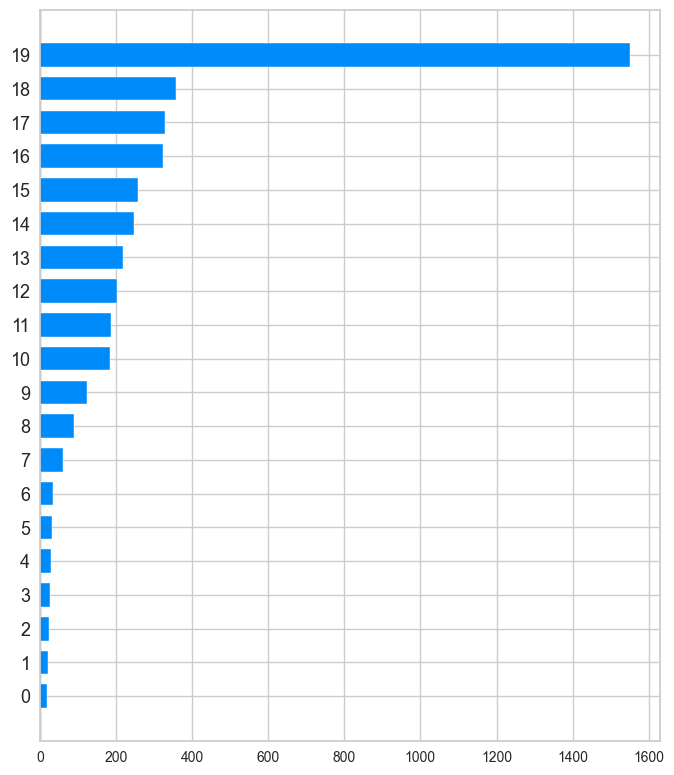

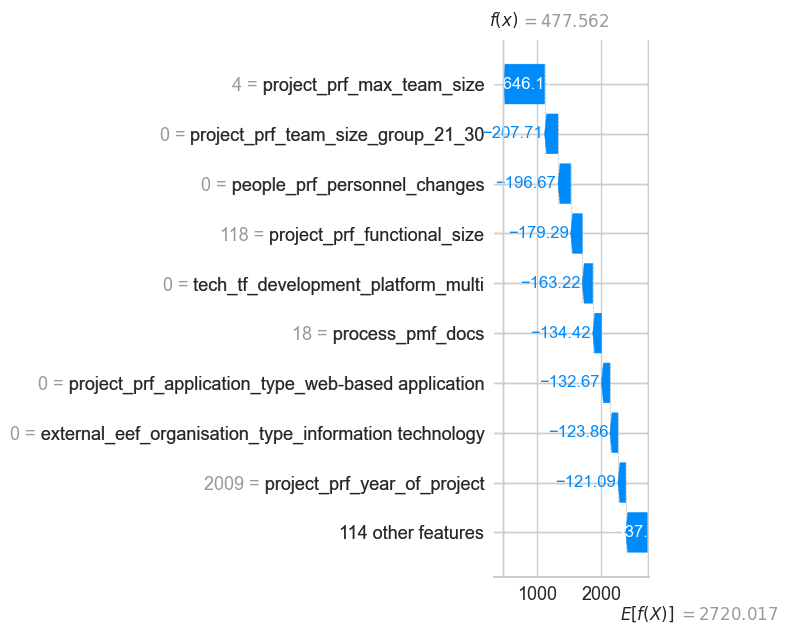

✅ SHAP waterfall plot saved to C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots\shap_waterfall_model2_GradientBoostingRegressor.png

✅ SHAP analysis completed successfully!

SHAP Analysis for Model 3
Output directory created: C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots
Successfully retrieved transformed data
   Shape: (85, 123)
   Data types: float64    71
bool       52
Name: count, dtype: int64
   Contains NaN: project_prf_year_of_project                      False
external_eef_industry_sector_service industry    False
external_eef_industry_sector_education           False
external_eef_industry_sector_government          False
external_eef_industry_sector_banking             False
                                                 ...  
tech_tf_client_server_yes                        False
tech_tf_web_development_web                      False
tech_tf_dbms_used_yes                            False
project_prf_cost_currency_canada__dollar         False
project

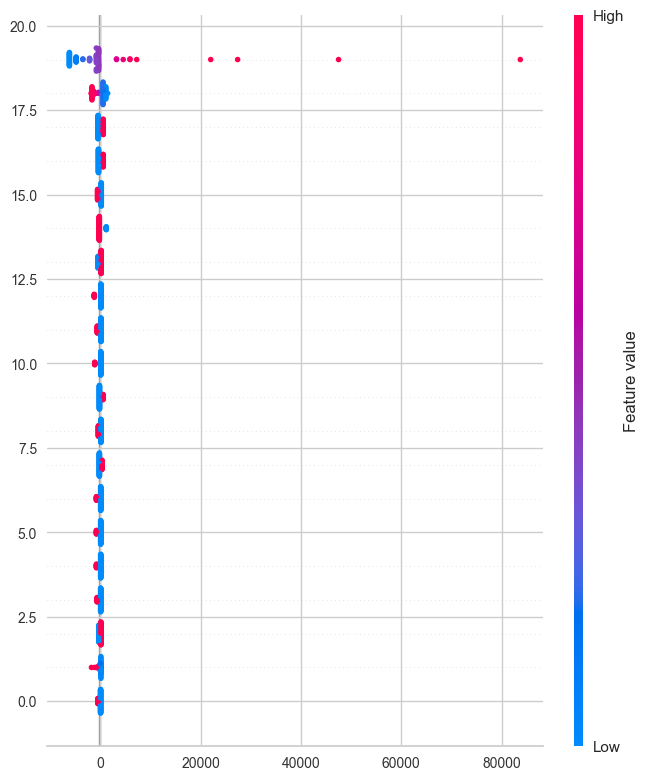

<Figure size 1000x700 with 0 Axes>

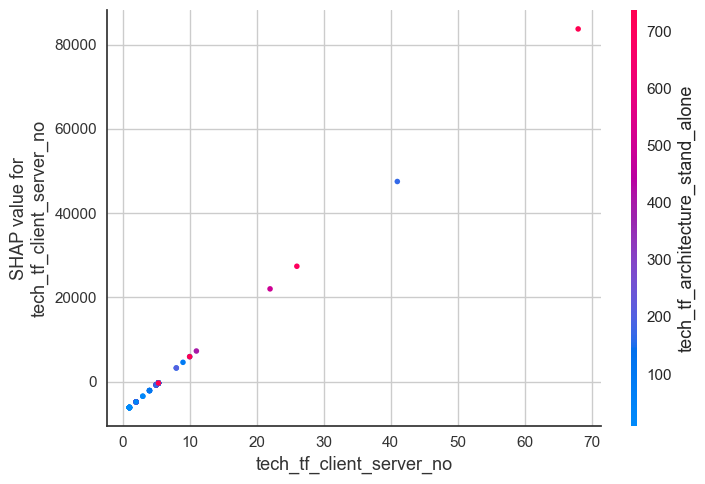

✅ SHAP dependence plot for 'tech_tf_client_server_no' saved to C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots\shap_dependence_tech_tf_client_server_no_model3_LinearRegression.png
❌ Error creating bar plot: list index out of range


✅ SHAP force plot saved to C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots\shap_force_model3_LinearRegression.html


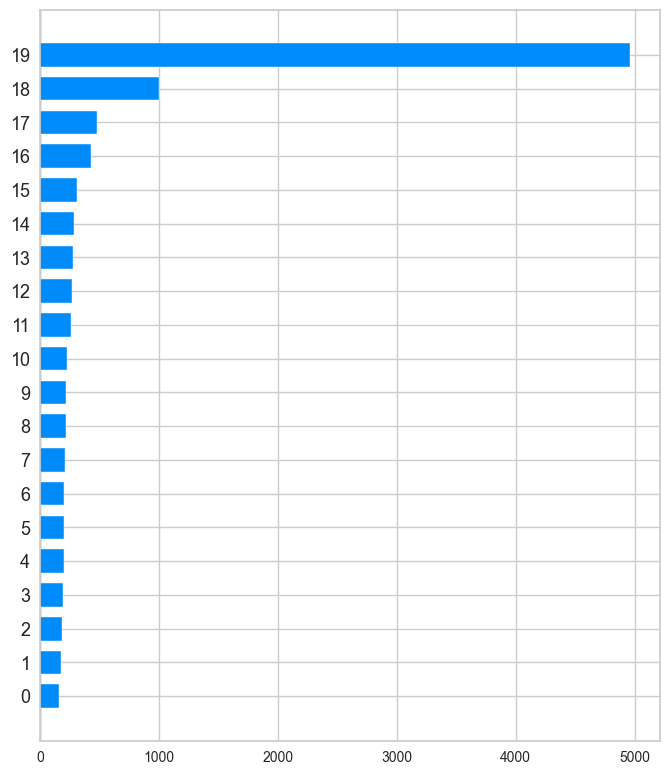

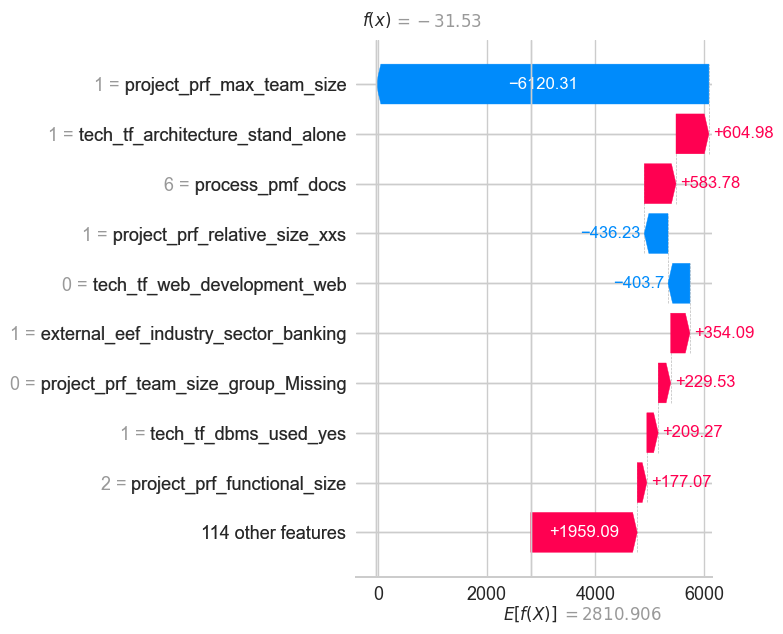

✅ SHAP waterfall plot saved to C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots\shap_waterfall_model3_LinearRegression.png

✅ SHAP analysis completed successfully!

Checking for output files:
✅ Found 18 files in plots directory:
   - correlation_heatmap.png
   - feature_importance.png
   - feature_importance_model_1_RandomForestRegressor.png
   - feature_importance_model_2_GradientBoostingRegressor.png
   - feature_importance_model_3_LinearRegression.png
   - shap_dependence_tech_tf_architecture_stand_alone_model1_RandomForestRegressor.png
   - shap_dependence_tech_tf_client_server_no_model2_GradientBoostingRegressor.png
   - shap_dependence_tech_tf_client_server_no_model3_LinearRegression.png
   - shap_force_model1_RandomForestRegressor.html
   - shap_force_model2_GradientBoostingRegressor.html
   - shap_force_model3_LinearRegression.html
   - shap_importance_bar.png
   - shap_summary.png
   - shap_waterfall.png
   - shap_waterfall_model1_RandomForestRegressor.png
   - shap

In [53]:
# SHAP analysis with proper data type handling and debugging
"""
Global Perspective:
- Summary Plot: Provides a global overview of feature importance and their 
  positive or negative impact on the model output across the entire dataset.
- Dependence Plot: Illustrates the relationship between a single feature's 
  value and its SHAP value across all instances to understand its general 
  effect on the prediction.
- Bar Chart: Shows the global importance of each feature based on the average 
  magnitude of their SHAP values across the entire dataset.

Single Instance Perspective:
- Force Plot: Explains the prediction for a single instance by showing how each 
  feature contributes to moving the prediction from the base value for that specific case.
- Waterfall Plot: Explains the prediction for a single instance by visualizing the sequential, 
  additive contribution of each feature's SHAP value for that specific prediction.
"""

def run_shap_analysis(tuned_model, model_index=1, debug=True):
    """
    Run SHAP analysis on a tuned model with enhanced debugging and all major SHAP plots.
    """
    print(f"\n{'='*50}")
    print(f"SHAP Analysis for Model {model_index}")
    print(f"{'='*50}")
    try:
        import shap
        import matplotlib.pyplot as plt
        import numpy as np
        import os

        os.makedirs('plots', exist_ok=True)
        if debug:
            print(f"Output directory created: {os.path.abspath('plots')}")

        try:
            X_transformed = get_config('X_transformed')
            if debug:
                print(f"Successfully retrieved transformed data")
                print(f"   Shape: {X_transformed.shape}")
                print(f"   Data types: {X_transformed.dtypes.value_counts()}")
                print(f"   Contains NaN: {np.isnan(X_transformed).any()}")
        except Exception as e:
            print(f"❌ Error getting transformed data: {e}")
            print("   Trying alternative approach...")
            try:
                X = get_config('X')
                X_transformed = X
                print(f"Using raw features instead. Shape: {X_transformed.shape}")
            except Exception as e2:
                print(f"❌ Error getting raw data: {e2}")
                raise ValueError("Could not access training data")
        
        model_name = type(tuned_model).__name__
        if debug:
            print(f"Model identified as: {model_name}")

        # Convert data to float64 for SHAP
        try:
            X_transformed_float = X_transformed.astype(np.float64)
            if debug:
                print("Data successfully converted to float64 type")
        except Exception as e:
            print(f"❌ Error converting data types: {e}")
            try:
                X_transformed_float = X_transformed.copy()
                for col in X_transformed.columns:
                    X_transformed_float[col] = pd.to_numeric(X_transformed[col], errors='coerce')
                X_transformed_float = X_transformed_float.fillna(0)
                print("Data converted using alternative method")
            except:
                print("❌ Could not convert data. Proceeding with original data.")
                X_transformed_float = X_transformed

        try:
            feature_names = get_config('X').columns.tolist()
            if debug:
                print(f"Retrieved {len(feature_names)} feature names")
        except:
            feature_names = [f"Feature_{i}" for i in range(X_transformed.shape[1])]
            print(f"⚠️ Could not get original feature names, using generic names")

        model_type = str(type(tuned_model)).lower()
        if debug:
            print(f"📊 Model type details: {model_type}")

        # Sample for efficiency
        sample_size = min(100, X_transformed_float.shape[0])
        sample_indices = np.random.choice(X_transformed_float.shape[0], sample_size, replace=False)
        X_sample = X_transformed_float.iloc[sample_indices] if hasattr(X_transformed_float, 'iloc') else X_transformed_float[sample_indices]

        # Choose SHAP explainer
        if any(x in model_type for x in ['tree', 'forest', 'xgboost', 'lgbm', 'catboost', 'gradientboosting']):
            print("🌲 Using TreeExplainer for tree-based model")
            explainer = shap.TreeExplainer(tuned_model)
            shap_values = explainer(X_sample)
        elif any(x in model_type for x in ['linear', 'logistic', 'ridge', 'lasso', 'huber']):
            print("📏 Using LinearExplainer for linear model")
            explainer = shap.LinearExplainer(tuned_model, X_sample)
            shap_values = explainer(X_sample)
        else:
            print("🔄 Using KernelExplainer as fallback (may be slow)")
            def model_predict(X):
                return tuned_model.predict(X)
            explainer = shap.KernelExplainer(model_predict, X_sample)
            shap_values = explainer.shap_values(X_sample)

        # Prepare shap_array for plotting
        shap_array = shap_values.values if hasattr(shap_values, "values") else shap_values

        print(f"shap_array shape: {getattr(shap_array, 'shape', 'N/A')}, X_sample shape: {X_sample.shape}")

        # ========== GLOBAL PERSPECTIVE ==========
        # 1. Summary Plot
        try:
            if isinstance(shap_array, np.ndarray) and shap_array.shape[1] == X_sample.shape[1]:
                plt.figure(figsize=(12, 10))
                shap.summary_plot(shap_array, X_sample, feature_names=feature_names, show=False)
                plt.tight_layout()
                summary_path = f'plots/shap_summary_model{model_index}_{model_name}.png'
                plt.savefig(summary_path)
                plt.show()  # This ensures it's visible inline
                plt.close()
                print(f"✅ SHAP summary plot saved to {os.path.abspath(summary_path)}")
            else:
                print(f"❌ SHAP values shape {shap_array.shape} does not match sample features {X_sample.shape}")
                print("Skipping summary plot.")
        except Exception as e:
            print(f"❌ Error creating summary plot: {e}")

        # 2. Dependence Plot (top global feature)
        try:
            # Top global feature by mean absolute SHAP value
            if isinstance(shap_array, np.ndarray) and shap_array.shape[1] == X_sample.shape[1]:
                top_idx = np.argsort(np.abs(shap_array).mean(0))[-1]
                top_feat = feature_names[top_idx]
                plt.figure(figsize=(10, 7))
                shap.dependence_plot(top_feat, shap_array, X_sample, feature_names=feature_names, show=False)
                dep_path = f'plots/shap_dependence_{top_feat}_model{model_index}_{model_name}.png'
                plt.tight_layout()
                plt.savefig(dep_path)
                plt.show()  # This ensures it's visible inline
                plt.close()
                print(f"✅ SHAP dependence plot for '{top_feat}' saved to {os.path.abspath(dep_path)}")
        except Exception as e:
            print(f"❌ Error creating dependence plot: {e}")

        # 3. Bar Chart (mean absolute SHAP values)
        try:
            if isinstance(shap_array, np.ndarray) and shap_array.shape[1] == X_sample.shape[1]:
                plt.figure(figsize=(12, 8))
                shap.summary_plot(shap_array, X_sample, feature_names=feature_names, plot_type="bar", show=False)
                plt.tight_layout()
                bar_path = f'plots/shap_importance_bar_model{model_index}_{model_name}.png'
                plt.savefig(bar_path)
                plt.show()  # This ensures it's visible inline
                plt.close()
                print(f"✅ SHAP feature importance bar plot saved to {os.path.abspath(bar_path)}")
        except Exception as e:
            print(f"❌ Error creating bar plot: {e}")

        # ========== SINGLE INSTANCE PERSPECTIVE ==========
        # Choose a single instance (first row of sample)
        instance = X_sample.iloc[0] if hasattr(X_sample, "iloc") else X_sample[0]
        shap_value_instance = shap_array[0] if isinstance(shap_array, np.ndarray) else shap_array[0]

        # 4. Force Plot
        try:
            force_path = f'plots/shap_force_model{model_index}_{model_name}.html'
            shap.initjs()
            force_plot = shap.force_plot(explainer.expected_value, shap_value_instance, instance, feature_names=feature_names, show=False, matplotlib=False)
            shap.save_html(force_path, force_plot)
            print(f"✅ SHAP force plot saved to {os.path.abspath(force_path)}")
        except Exception as e:
            print(f"❌ Could not create force plot: {e}")

        # 5. Waterfall Plot
        try:
            plt.figure(figsize=(10, 8))
            shap.plots.waterfall(shap_values[0], show=False)
            plt.tight_layout()
            waterfall_path = f'plots/shap_waterfall_model{model_index}_{model_name}.png'
            plt.savefig(waterfall_path)
            plt.show()  # This ensures it's visible inline
            plt.close()
            print(f"✅ SHAP waterfall plot saved to {os.path.abspath(waterfall_path)}")
        except Exception as e:
            print(f"❌ Could not create waterfall plot: {e}")

        print("\n✅ SHAP analysis completed successfully!")
        return True

    except Exception as e:
        print(f"\n❌ SHAP analysis failed: {e}")
        print("\n⚠️ Trying PyCaret's built-in SHAP plot as fallback...")
        try:
            from pycaret.regression import plot_model
            plot_model(tuned_model, plot='shap', save=True)
            print("✅ SHAP plot created using PyCaret's built-in functionality")
            return True
        except Exception as e2:
            print(f"❌ PyCaret's SHAP plot also failed: {e2}")
            print("\n💡 Recommendations:")
            print("   1. Check if your model is compatible with SHAP")
            print("   2. Try running just the model importance plot: plot_model(tuned_model, plot='feature')")
            print("   3. Make sure your model is properly trained and accessible")
            print("   4. Verify that you have the latest versions of SHAP and matplotlib")
            return False



# Use this to check if your plots directory exists and what's in it
def check_outputs():
    print("\nChecking for output files:")
    try:
        if os.path.exists('plots'):
            files = os.listdir('plots')
            if files:
                print(f"✅ Found {len(files)} files in plots directory:")
                for file in files:
                    print(f"   - {file}")
            else:
                print("⚠️ 'plots' directory exists but is empty")
        else:
            print("❌ 'plots' directory does not exist")
    except Exception as e:
        print(f"❌ Error checking outputs: {e}")

# First check if required packages are installed
if check_and_install_packages():
    # If you have a trained model from PyCaret, use it like this:
    from pycaret.regression import load_model, setup, get_config
    
    # Load your dataset and set up PyCaret (replace with your actual code)
    # df = pd.read_csv('your_dataset.csv')
    # setup(df, target='your_target_column')
    
    # Either load an existing model or use your already trained model
    """
    try:
        # If you have a saved model:
        #model = load_model('your_saved_model_path')
        print("Model loaded successfully!")
    except:
        print("Please replace 'your_saved_model_path' with your actual model path")
        print("Or use your existing trained model variable")
        # model = your_existing_trained_model_variable
    """
    
    # Call the SHAP analysis function with your model
    # run_shap_analysis(model, model_index=1, debug=True)

# -------- RUN SHAP FOR ALL TUNED MODELS --------
for idx, tuned_model in enumerate(tuned_models, 1):
    run_shap_analysis(tuned_model, model_index=idx, debug=True)

# Optionally, check plot outputs
check_outputs()

In [51]:
# Extract feature importance directly (if available)

from pycaret.regression import get_config
import pandas as pd
import numpy as np
import os

os.makedirs('data', exist_ok=True)  # Ensure output directory exists

for idx, tuned_model in enumerate(tuned_models, 1):
    model_name = type(tuned_model).__name__
    print(f"\nModel {idx}: {model_name}")

    try:
        feature_names = get_config('X_transformed').columns

        if hasattr(tuned_model, 'feature_importances_'):
            importances = tuned_model.feature_importances_
            importance_label = 'feature_importances_'
        elif hasattr(tuned_model, 'coef_'):
            importances = np.abs(tuned_model.coef_)
            importance_label = 'coef_ (abs)'
        else:
            print("Feature importance attribute not available for this model.")
            continue

        # Ensure lengths match
        if len(feature_names) != len(importances):
            print(f"Warning: Length mismatch - {len(feature_names)} features vs {len(importances)} importance values")
            min_length = min(len(feature_names), len(importances))
            feature_names = feature_names[:min_length]
            importances = importances[:min_length]

        fi = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        })
        fi = fi.sort_values('importance', ascending=False)
        print(fi.head(15))  # Show top 15 features

        # Save to CSV with model index and name
        out_path = f"data/feature_importance_model_{idx}_{model_name}.csv"
        fi.to_csv(out_path, index=False)
        print(f"Feature importance ({importance_label}) saved to '{out_path}'")
    except Exception as e:
        print(f"Failed to extract feature importance for {model_name}: {e}")


Model 1: RandomForestRegressor
                                               feature  importance
113                 tech_tf_architecture_client_server    0.088813
55                         project_prf_functional_size    0.086489
56                           project_prf_max_team_size    0.070925
79                  tech_tf_development_platform_multi    0.058653
35   project_prf_application_type_surveillance and ...    0.054599
70                        people_prf_personnel_changes    0.054558
15   external_eef_organisation_type_banking; commun...    0.043037
116                   tech_tf_architecture_stand_alone    0.038834
4                 external_eef_industry_sector_banking    0.037780
118                          tech_tf_client_server_yes    0.036945
80                     tech_tf_development_platform_pc    0.036848
72   project_prf_application_group_business_applica...    0.035495
85             tech_tf_primary_programming_language_c_    0.033849
0                          pro